## This code is to perform task for Math dataset

## 1. data input

In [2]:
import pandas as pd
import numpy as np
import csv
import random

csvfile = open('student-mat.csv',newline = '')
input_data = csv.reader(csvfile, delimiter = ';')

math_data = []
for row in input_data:
    math_data.append(row)
csvfile.close()

csvfile = open('student-mat.csv',newline = '')
input_data = csv.reader(csvfile, delimiter = ';')

math_data2 = []
for row in input_data:
    math_data2.append(row)
csvfile.close()


## 2. data preprocessing

In [3]:
#get the entropy of all feature
import math

math_data_binary = math_data[1:]
math_data_level = math_data2[1:]
# one-hot encoding to map categorical feature to number label for data used in sklearn

# initilize one_hot_list to store the mapping of categorical feature to number
one_hot_list = {}
for i in range(len(math_data[0])):
    try:
        if not math_data_binary[0][i].isnumeric():
            one_hot_list[math_data[0][i]] = {}
    except:
        pass

# change the value of categorical feature to number : binary classification dataset
for j in range(0,len(math_data[0])):
    #print("check : ",one_hot_list)
    if math_data[0][j] in one_hot_list: # if feature is categorical
        feature_now = math_data[0][j]
        for i in range(0,len(math_data_binary)): # modify all the value of categorical feature
            if math_data_binary[i][j] in one_hot_list[feature_now]:
                math_data_binary[i][j] = one_hot_list[feature_now][math_data_binary[i][j]]
            else:
                one_hot_list[feature_now][math_data_binary[i][j]] = len(one_hot_list[math_data[0][j]]) + 1
                math_data_binary[i][j] = len(one_hot_list[feature_now])
    else:
        for i in range(0,len(math_data_binary)):
            math_data_binary[i][j] = int(math_data_binary[i][j])

# change the value of categorical feature to number : 5-level classification dataset
for j in range(0,len(math_data[0])):
    if math_data[0][j] in one_hot_list: # if feature is categorical
        feature_now = math_data[0][j]
        for i in range(0,len(math_data_level)): # modify all the value of categorical feature
            if math_data_level[i][j] in one_hot_list[feature_now]:
                math_data_level[i][j] = one_hot_list[feature_now][math_data_level[i][j]]
            else:
                one_hot_list[feature_now][math_data_level[i][j]] = len(one_hot_list[math_data[0][j]]) + 1
                math_data_level[i][j] = len(one_hot_list[feature_now])
    else:
        for i in range(0,len(math_data_level)):
            math_data_level[i][j] = int(math_data_level[i][j])


#change G3 of each student to 5 level
for i in range(len(math_data_level)):
    if int(math_data_level[i][len(math_data_level[0])-1]) <= 9: # G3<=9, level : fail
        math_data_level[i][len(math_data_level[0])-1] = "fail"
    elif int(math_data_level[i][len(math_data_level[0])-1]) >= 10 and int(math_data_level[i][len(math_data_level[0])-1]) <= 11:
        math_data_level[i][len(math_data_level[0])-1] = "sufficient"
    elif int(math_data_level[i][len(math_data_level[0])-1]) >= 11 and int(math_data_level[i][len(math_data_level[0])-1]) <= 13:
        math_data_level[i][len(math_data_level[0])-1] = "satisfactory"
    elif int(math_data_level[i][len(math_data_level[0])-1]) >= 14 and int(math_data_level[i][len(math_data_level[0])-1]) <= 15:
        math_data_level[i][len(math_data_level[0])-1] = "good" 
    elif int(math_data_level[i][len(math_data_level[0])-1]) >= 16 and int(math_data_level[i][len(math_data_level[0])-1]) <= 20:
        math_data_level[i][len(math_data_level[0])-1] = "excellent"


# change G3 of each student to pass/fail

for i in range(len(math_data_binary)):
    if math_data_binary[i][len(math_data_binary[0])-1] >= 10:
        math_data_binary[i][len(math_data_binary[0])-1] = "pass"
    else:
        math_data_binary[i][len(math_data_binary[0])-1] = "fail"


random.shuffle(math_data_binary)
random.shuffle(math_data_level)

## 3. model construction & 4. validation

In [4]:
import sklearn.tree as tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import ensemble
from sklearn import neighbors

# parameter for k-fold validation
k = 3

# decision tree model
tree_binary = tree.DecisionTreeClassifier(criterion = "entropy")
tree_level = tree.DecisionTreeClassifier(criterion = "entropy")

# test and train dataset for binary classification
math_data_binary_x = [row[0:len(row)-1] for row in math_data_binary]
math_data_binary_y = [row[len(row)-1] for row in math_data_binary]

# test and train dataset for 5-level classification
math_data_level_x = [row[0:len(row)-1] for row in math_data_level]
math_data_level_y = [row[len(row)-1] for row in math_data_level]


# train and test dataset for all the model under different condition
x_train_binary, x_test_binary, y_train_binary, y_test_binary = train_test_split(math_data_binary_x, math_data_binary_y, test_size = 0.3)
x_train_level, x_test_level, y_train_level, y_test_level = train_test_split(math_data_level_x, math_data_level_y, test_size = 0.3)


print("Decision Tree:")
# decision tree model : binary classification
# binary classification : holdout validation 
tree_binary.fit(x_train_binary,y_train_binary)
print("the accuracy of decision tree(binary classification & holdout) is : ",metrics.accuracy_score(y_test_binary,tree_binary.predict(x_test_binary)))

# binary classification : k-fold cross validation
average_accuracy_binary = 0

for i in range(0,len(math_data_binary_x),int(len(math_data_binary_x)/k)):
    if i + int(len(math_data_binary_x)/k) <= len(math_data_binary_x):
        test_x_now = math_data_binary_x[i:i+int(len(math_data_binary_x)/k)]
        train_x_now = math_data_binary_x[:i] + math_data_binary_x[i+int(len(math_data_binary_x)/k):]
        test_y_now = math_data_binary_y[i:i+int(len(math_data_binary_x)/k)]
        train_y_now = math_data_binary_y[:i] + math_data_binary_y[i+int(len(math_data_binary_y)/k):]
        tree_binary.fit(train_x_now, train_y_now)
        average_accuracy_binary += metrics.accuracy_score(test_y_now,tree_binary.predict(test_x_now))

average_accuracy_binary /= k
print("the average accuracy of decision tree(binary classification & k-fold) is : ",average_accuracy_binary)        


# decision tree model : 5-level classification
# 5-level classification : holdout validation
tree_level.fit(x_train_level, y_train_level)
print("the accuracy of decision tree(5-level classification & holdout) is : ",metrics.accuracy_score(y_test_level,tree_level.predict(x_test_level)))

# 5-level classification : k-fold
average_accuracy_level = 0
for i in range(0,len(math_data_level_x),int(len(math_data_level_x)/k)):
    if i + int(len(math_data_level_x)/k) <= len(math_data_level_x):
        test_x_now = math_data_level_x[i:i+int(len(math_data_level_x)/k)]
        train_x_now = math_data_level_x[:i] + math_data_level_x[i+int(len(math_data_level_x)/k):]
        test_y_now = math_data_level_y[i:i+int(len(math_data_level_x)/k)]
        train_y_now = math_data_level_y[:i] + math_data_level_y[i+int(len(math_data_level_y)/k):]
        tree_level.fit(train_x_now, train_y_now)
        average_accuracy_level += metrics.accuracy_score(test_y_now,tree_level.predict(test_x_now))

average_accuracy_level /= k
print("the average accuracy of decision tree(5-level classification & k-fold) is : ",average_accuracy_level)
print()



#Random forest
print("Random forest : ")

# random forest when k=10 : binary classification
# binary classification : holdout
forest_10 = ensemble.RandomForestClassifier(n_estimators = 10, criterion = "entropy")
forest_10.fit(x_train_binary,y_train_binary)
print("the accuray of random forest with tree number = 10(binary classification & holdout) is :",metrics.accuracy_score(y_test_binary,forest_10.predict(x_test_binary)))

# binary classification : k-fold
average_accuracy_binary = 0
for i in range(0,len(math_data_binary_x),int(len(math_data_binary_x)/k)):
    if i + int(len(math_data_binary_x)/k) <= len(math_data_binary_x):
        test_x_now = math_data_binary_x[i:i+int(len(math_data_binary_x)/k)]
        train_x_now = math_data_binary_x[:i] + math_data_binary_x[i+int(len(math_data_binary_x)/k):]
        test_y_now = math_data_binary_y[i:i+int(len(math_data_binary_x)/k)]
        train_y_now = math_data_binary_y[:i] + math_data_binary_y[i+int(len(math_data_binary_y)/k):]
        forest_10.fit(train_x_now,train_y_now)
        average_accuracy_binary += metrics.accuracy_score(test_y_now,forest_10.predict(test_x_now))

average_accuracy_binary /= k
print("the average accuray of random forest with tree number = 10(binary classification & k-fold) is :",average_accuracy_binary)

# random forest : 5-level classification
# 5-level classification : holdout
forest_10.fit(x_train_level,y_train_level)
print("the accuray of random forest with tree number = 10(5-level classification & holdout) is :",metrics.accuracy_score(y_test_level,forest_10.predict(x_test_level)))

# 5-level classification : k-fold
average_accuracy_level = 0
for i in range(0,len(math_data_level_x),int(len(math_data_level)/k)):
    if i + int(len(math_data_level_x)/k) <= len(math_data_level_x):
        test_x_now = math_data_level_x[i:i+int(len(math_data_level_x)/k)]
        train_x_now = math_data_level_x[:i] + math_data_level_x[i+int(len(math_data_level_x)/k):]
        test_y_now = math_data_level_y[i:i+int(len(math_data_level_x)/k)]
        train_y_now = math_data_level_y[:i] + math_data_level_y[i+int(len(math_data_level_y)/k):]
        forest_10.fit(train_x_now, train_y_now)
        average_accuracy_level += metrics.accuracy_score(test_y_now,forest_10.predict(test_x_now))

average_accuracy_level /= k
print("the average accuracy of random forest with tree number = 10(5-level classification & k-fold) is : ",average_accuracy_level)


# random forest when k=100 : binary classification
# binary classification : holdout
forest_100 = ensemble.RandomForestClassifier(n_estimators = 100, criterion = "entropy")
forest_100.fit(x_train_binary,y_train_binary)
print("the accuray of random forest with tree number = 100(binary classification & holdout) is :",metrics.accuracy_score(y_test_binary,forest_100.predict(x_test_binary)))

# binary classification : k-fold
average_accuracy_binary = 0
for i in range(0,len(math_data_binary_x),int(len(math_data_binary_x)/k)):
    if i + int(len(math_data_binary_x)/k) <= len(math_data_binary_x):
        test_x_now = math_data_binary_x[i:i+int(len(math_data_binary_x)/k)]
        train_x_now = math_data_binary_x[:i] + math_data_binary_x[i+int(len(math_data_binary_x)/k):]
        test_y_now = math_data_binary_y[i:i+int(len(math_data_binary_x)/k)]
        train_y_now = math_data_binary_y[:i] + math_data_binary_y[i+int(len(math_data_binary_y)/k):]
        forest_100.fit(train_x_now,train_y_now)
        average_accuracy_binary += metrics.accuracy_score(test_y_now,forest_100.predict(test_x_now))

average_accuracy_binary /= k
print("the average accuray of random forest with tree number = 100(binary classification & k-fold) is :",average_accuracy_binary)

# random forest : 5-level classification
# 5-level classification : holdout
forest_100.fit(x_train_level,y_train_level)
print("the accuray of random forest with tree number = 100(5-level classification & holdout) is :",metrics.accuracy_score(y_test_level,forest_100.predict(x_test_level)))

# 5-level classification : k-fold
average_accuracy_level = 0
for i in range(0,len(math_data_level_x),int(len(math_data_level)/k)):
    if i + int(len(math_data_level_x)/k) <= len(math_data_level_x):
        test_x_now = math_data_level_x[i:i+int(len(math_data_level_x)/k)]
        train_x_now = math_data_level_x[:i] + math_data_level_x[i+int(len(math_data_level_x)/k):]
        test_y_now = math_data_level_y[i:i+int(len(math_data_level_x)/k)]
        train_y_now = math_data_level_y[:i] + math_data_level_y[i+int(len(math_data_level_y)/k):]
        forest_100.fit(train_x_now, train_y_now)
        average_accuracy_level += metrics.accuracy_score(test_y_now,forest_100.predict(test_x_now))

average_accuracy_level /= k
print("the average accuracy of random forest with tree number = 100(5-level classification & k-fold) is : ",average_accuracy_level)


# random forest when k=1000 : binary classification
# binary classification : holdout
forest_1000 = ensemble.RandomForestClassifier(n_estimators = 1000, criterion = "entropy")
forest_1000.fit(x_train_binary,y_train_binary)
print("the accuray of random forest with tree number = 1000(binary classification & holdout) is :",metrics.accuracy_score(y_test_binary,forest_1000.predict(x_test_binary)))

# binary classification : k-fold
average_accuracy_binary = 0
for i in range(0,len(math_data_binary_x),int(len(math_data_binary_x)/k)):
    if i + int(len(math_data_binary_x)/k) <= len(math_data_binary_x):
        test_x_now = math_data_binary_x[i:i+int(len(math_data_binary_x)/k)]
        train_x_now = math_data_binary_x[:i] + math_data_binary_x[i+int(len(math_data_binary_x)/k):]
        test_y_now = math_data_binary_y[i:i+int(len(math_data_binary_x)/k)]
        train_y_now = math_data_binary_y[:i] + math_data_binary_y[i+int(len(math_data_binary_y)/k):]
        forest_1000.fit(train_x_now,train_y_now)
        average_accuracy_binary += metrics.accuracy_score(test_y_now,forest_1000.predict(test_x_now))

average_accuracy_binary /= k
print("the average accuray of random forest with tree number = 1000(binary classification & k-fold) is :",average_accuracy_binary)

# random forest : 5-level classification
# 5-level classification : holdout
forest_1000.fit(x_train_level,y_train_level)
print("the accuray of random forest with tree number = 1000(5-level classification & holdout) is :",metrics.accuracy_score(y_test_level,forest_1000.predict(x_test_level)))

# 5-level classification : k-fold
average_accuracy_level = 0
for i in range(0,len(math_data_level_x),int(len(math_data_level)/k)):
    if i + int(len(math_data_level_x)/k) <= len(math_data_level_x):
        test_x_now = math_data_level_x[i:i+int(len(math_data_level_x)/k)]
        train_x_now = math_data_level_x[:i] + math_data_level_x[i+int(len(math_data_level_x)/k):]
        test_y_now = math_data_level_y[i:i+int(len(math_data_level_x)/k)]
        train_y_now = math_data_level_y[:i] + math_data_level_y[i+int(len(math_data_level_y)/k):]
        forest_1000.fit(train_x_now, train_y_now)
        average_accuracy_level += metrics.accuracy_score(test_y_now,forest_1000.predict(test_x_now))

average_accuracy_level /= k
print("the average accuracy of random forest with tree number = 1000(5-level classification & k-fold) is : ",average_accuracy_level)
print()




print("KNN : ")
# KNN
# the k for comparison : 1, 10 and 50
knn_1 = neighbors.KNeighborsClassifier(n_neighbors = 1, weights = "uniform")
knn_10 = neighbors.KNeighborsClassifier(n_neighbors = 10, weights = "uniform")
knn_50 = neighbors.KNeighborsClassifier(n_neighbors = 50, weights = "uniform")

# KNN when k is 1 : binary selection
# binary classification : holdout
knn_1.fit(x_train_binary,y_train_binary)
print("the accuracy of KNN when k is 1(binary classification & holdout) is : ",metrics.accuracy_score(y_test_binary,knn_1.predict(x_test_binary)))

# binary classification : k-fold
average_accuracy_binary = 0
for i in range(0,len(math_data_binary_x),int(len(math_data_binary_x)/k)):
    if i + int(len(math_data_binary_x)/k) <= len(math_data_binary_x):
        test_x_now = math_data_binary_x[i:i+int(len(math_data_binary_x)/k)]
        train_x_now = math_data_binary_x[:i] + math_data_binary_x[i+int(len(math_data_binary_x)/k):]
        test_y_now = math_data_binary_y[i:i+int(len(math_data_binary_x)/k)]
        train_y_now = math_data_binary_y[:i] + math_data_binary_y[i+int(len(math_data_binary_y)/k):]
        knn_1.fit(train_x_now,train_y_now)
        average_accuracy_binary += metrics.accuracy_score(test_y_now, knn_1.predict(test_x_now))

average_accuracy_binary /= k
print("the average accuracy of KNN when k is 1(binary classification & k-fold) is : ",average_accuracy_binary)   

# KNN when k is 1 : 5-level classification
# 5-level classification : holdout
knn_1.fit(x_train_level,y_train_level)
print("the accuracy of KNN when k is 1(5-level classification & holdout) is : ",metrics.accuracy_score(y_test_level,knn_1.predict(x_test_level)))

# 5-level classification : k-fold
average_accuracy_level = 0
for i in range(0,len(math_data_level_x),int(len(math_data_level)/k)):
    if i + int(len(math_data_level_x)/k) <= len(math_data_level_x):
        test_x_now = math_data_level_x[i:i+int(len(math_data_level_x)/k)]
        train_x_now = math_data_level_x[:i] + math_data_level_x[i+int(len(math_data_level_x)/k):]
        test_y_now = math_data_level_y[i:i+int(len(math_data_level_x)/k)]
        train_y_now = math_data_level_y[:i] + math_data_level_y[i+int(len(math_data_level_y)/k):]
        knn_1.fit(train_x_now, train_y_now)
        average_accuracy_level += metrics.accuracy_score(test_y_now,knn_1.predict(test_x_now))

average_accuracy_level /= k
print("the average accuracy of KNN when k is 1(5-level classification & k-fold) is : ",average_accuracy_level)


# KNN when k is 10 : binary selection
# binary classification : holdout
knn_10.fit(x_train_binary,y_train_binary)
print("the accuracy of KNN when k is 10(binary classification & holdout) is : ",metrics.accuracy_score(y_test_binary,knn_10.predict(x_test_binary)))

# binary classification : k-fold
average_accuracy_binary = 0
for i in range(0,len(math_data_binary_x),int(len(math_data_binary_x)/k)):
    if i + int(len(math_data_binary_x)/k) <= len(math_data_binary_x):
        test_x_now = math_data_binary_x[i:i+int(len(math_data_binary_x)/k)]
        train_x_now = math_data_binary_x[:i] + math_data_binary_x[i+int(len(math_data_binary_x)/k):]
        test_y_now = math_data_binary_y[i:i+int(len(math_data_binary_x)/k)]
        train_y_now = math_data_binary_y[:i] + math_data_binary_y[i+int(len(math_data_binary_y)/k):]
        knn_10.fit(train_x_now,train_y_now)
        average_accuracy_binary += metrics.accuracy_score(test_y_now, knn_10.predict(test_x_now))

average_accuracy_binary /= k
print("the average accuracy of KNN when k is 10(binary classification & k-fold) is : ",average_accuracy_binary)   

# KNN when k is 10 : 5-level classification
# 5-level classification : holdout
knn_10.fit(x_train_level,y_train_level)
print("the accuracy of KNN when k is 10(5-level classification & holdout) is : ",metrics.accuracy_score(y_test_level,knn_10.predict(x_test_level)))

# 5-level classification : k-fold
average_accuracy_level = 0
for i in range(0,len(math_data_level_x),int(len(math_data_level)/k)):
    if i + int(len(math_data_level_x)/k) <= len(math_data_level_x):
        test_x_now = math_data_level_x[i:i+int(len(math_data_level_x)/k)]
        train_x_now = math_data_level_x[:i] + math_data_level_x[i+int(len(math_data_level_x)/k):]
        test_y_now = math_data_level_y[i:i+int(len(math_data_level_x)/k)]
        train_y_now = math_data_level_y[:i] + math_data_level_y[i+int(len(math_data_level_y)/k):]
        knn_10.fit(train_x_now, train_y_now)
        average_accuracy_level += metrics.accuracy_score(test_y_now,knn_10.predict(test_x_now))

average_accuracy_level /= k
print("the average accuracy of KNN when k is 10(5-level classification & k-fold) is : ",average_accuracy_level)


# KNN when k is 50 : binary selection
# binary classification : holdout
knn_50.fit(x_train_binary,y_train_binary)
print("the accuracy of KNN when k is 50(binary classification & holdout) is : ",metrics.accuracy_score(y_test_binary,knn_50.predict(x_test_binary)))

# binary classification : k-fold
average_accuracy_binary = 0
for i in range(0,len(math_data_binary_x),int(len(math_data_binary_x)/k)):
    if i + int(len(math_data_binary_x)/k) <= len(math_data_binary_x):
        test_x_now = math_data_binary_x[i:i+int(len(math_data_binary_x)/k)]
        train_x_now = math_data_binary_x[:i] + math_data_binary_x[i+int(len(math_data_binary_x)/k):]
        test_y_now = math_data_binary_y[i:i+int(len(math_data_binary_x)/k)]
        train_y_now = math_data_binary_y[:i] + math_data_binary_y[i+int(len(math_data_binary_y)/k):]
        knn_50.fit(train_x_now,train_y_now)
        average_accuracy_binary += metrics.accuracy_score(test_y_now, knn_50.predict(test_x_now))

average_accuracy_binary /= k
print("the average accuracy of KNN when k is 50(binary classification & k-fold) is : ",average_accuracy_binary)   

# KNN when k is 50 : 5-level classification
# 5-level classification : holdout
knn_50.fit(x_train_level,y_train_level)
print("the accuracy of KNN when k is 50(5-level classification & holdout) is : ",metrics.accuracy_score(y_test_level,knn_50.predict(x_test_level)))

# 5-level classification : k-fold
average_accuracy_level = 0
for i in range(0,len(math_data_level_x),int(len(math_data_level)/k)):
    if i + int(len(math_data_level_x)/k) <= len(math_data_level_x):
        test_x_now = math_data_level_x[i:i+int(len(math_data_level_x)/k)]
        train_x_now = math_data_level_x[:i] + math_data_level_x[i+int(len(math_data_level_x)/k):]
        test_y_now = math_data_level_y[i:i+int(len(math_data_level_x)/k)]
        train_y_now = math_data_level_y[:i] + math_data_level_y[i+int(len(math_data_level_y)/k):]
        knn_50.fit(train_x_now, train_y_now)
        average_accuracy_level += metrics.accuracy_score(test_y_now,knn_50.predict(test_x_now))

average_accuracy_level /= k
print("the average accuracy of KNN when k is 50(5-level classification & k-fold) is : ",average_accuracy_level)


Decision Tree:
the accuracy of decision tree(binary classification & holdout) is :  0.8571428571428571
the average accuracy of decision tree(binary classification & k-fold) is :  0.8829516539440204
the accuracy of decision tree(5-level classification & holdout) is :  0.7226890756302521
the average accuracy of decision tree(5-level classification & k-fold) is :  0.6844783715012722

Random forest : 
the accuray of random forest with tree number = 10(binary classification & holdout) is : 0.9159663865546218
the average accuray of random forest with tree number = 10(binary classification & k-fold) is : 0.8931297709923663
the accuray of random forest with tree number = 10(5-level classification & holdout) is : 0.6302521008403361
the average accuracy of random forest with tree number = 10(5-level classification & k-fold) is :  0.6717557251908396
the accuray of random forest with tree number = 100(binary classification & holdout) is : 0.9411764705882353
the average accuray of random forest wit

## 5. Result

Decision Tree : 


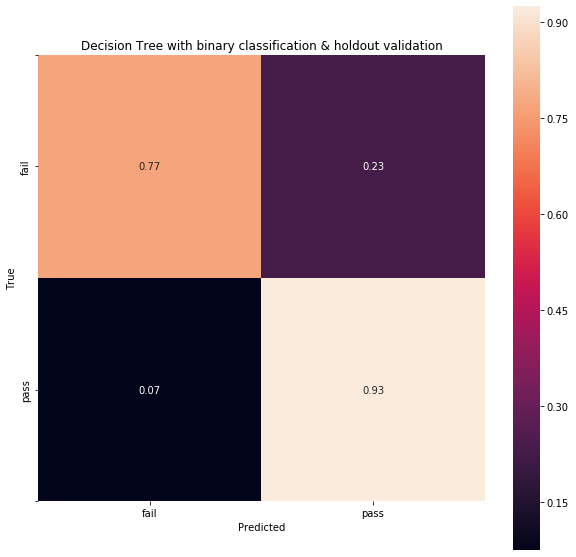

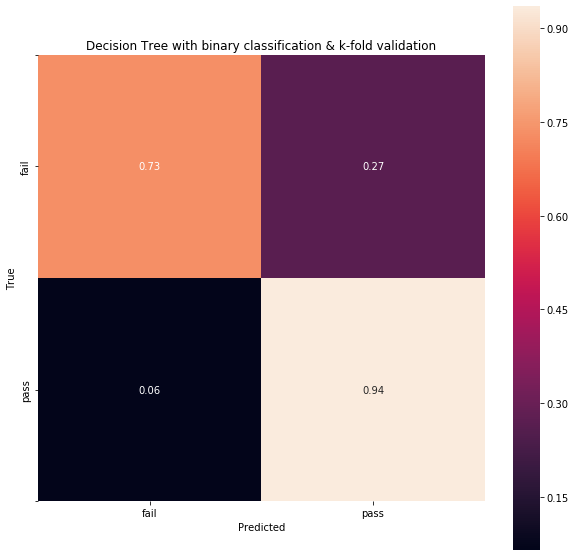

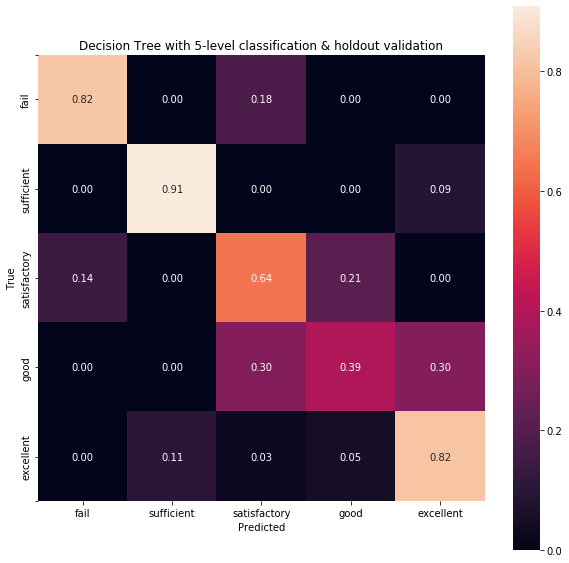

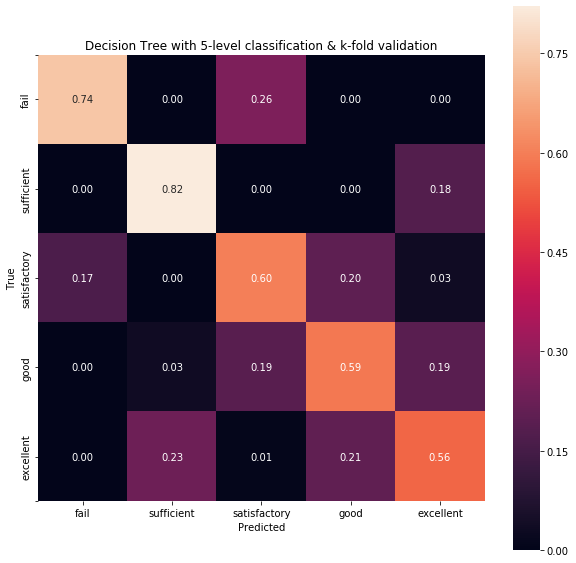


Random forest : 


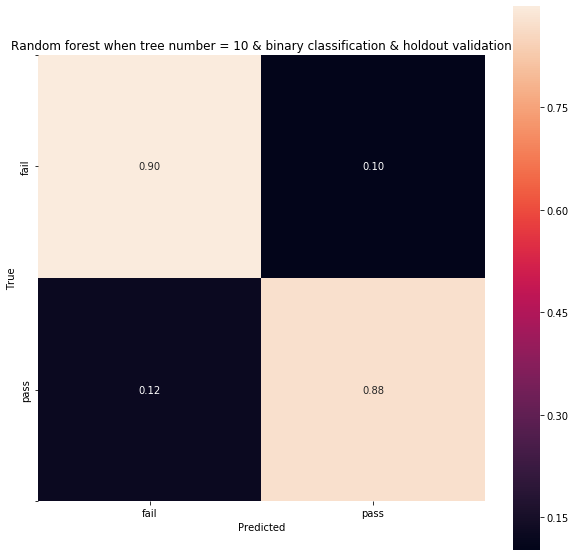

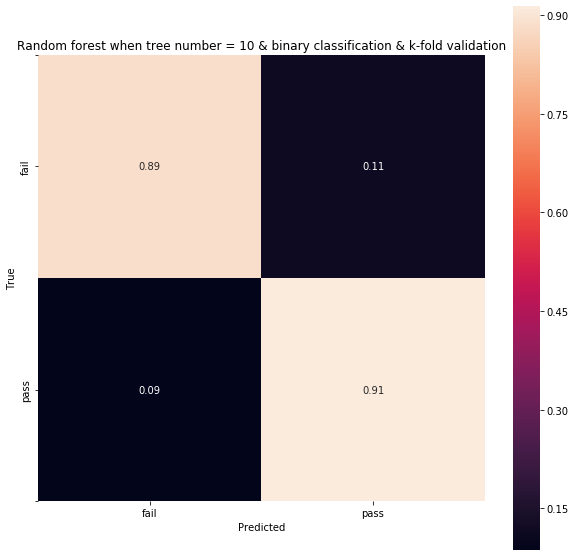

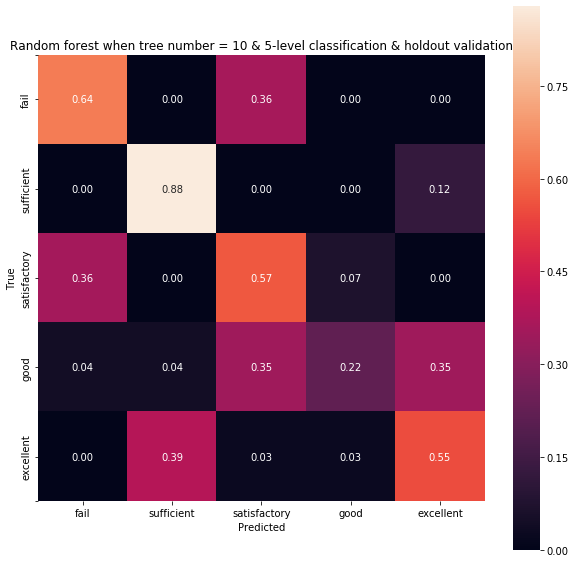

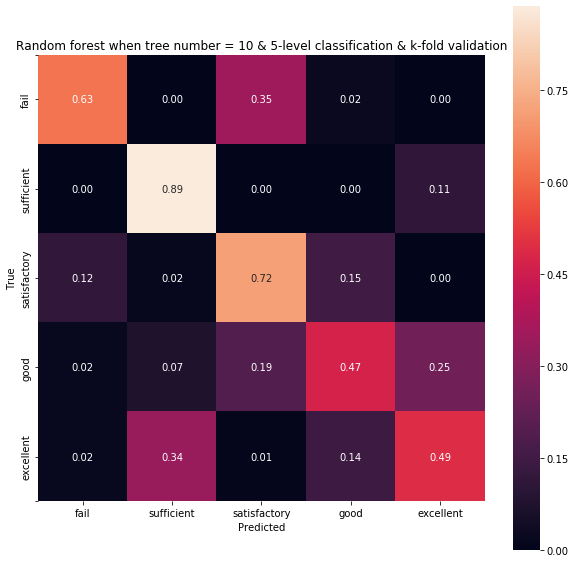

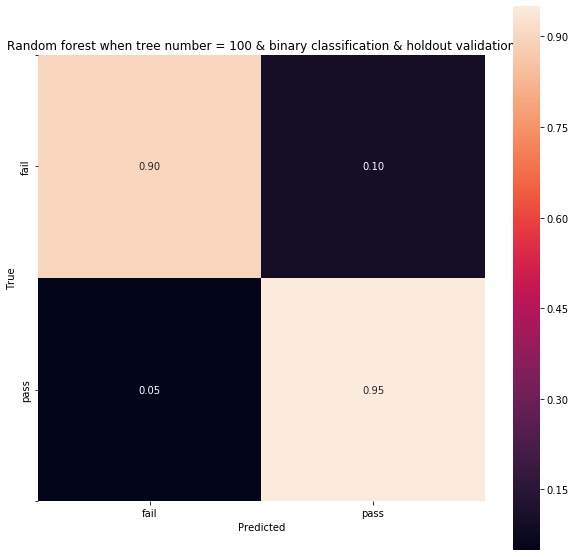

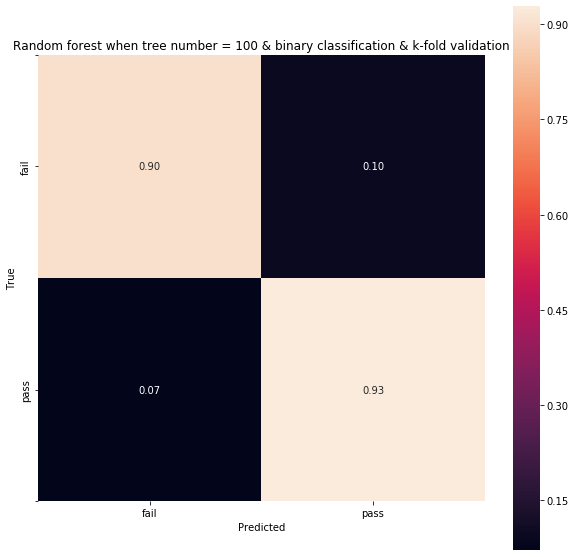

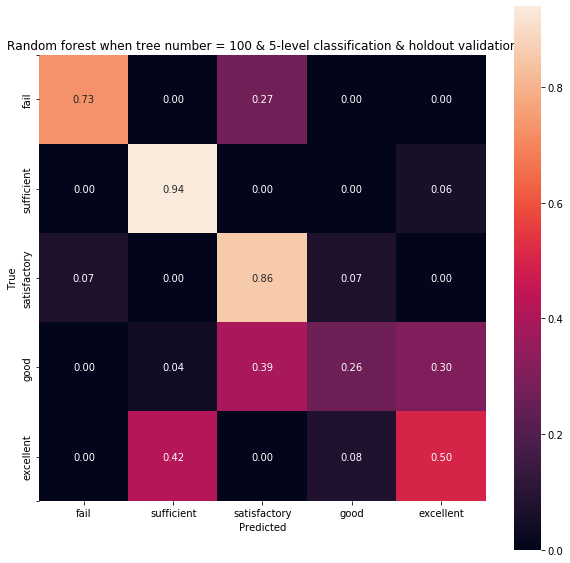

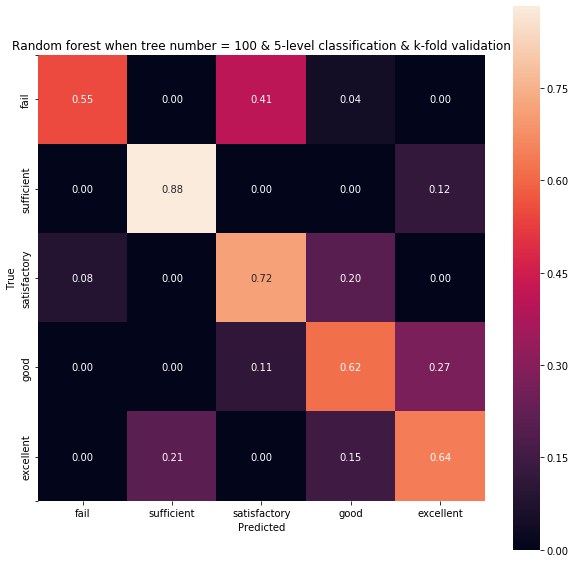

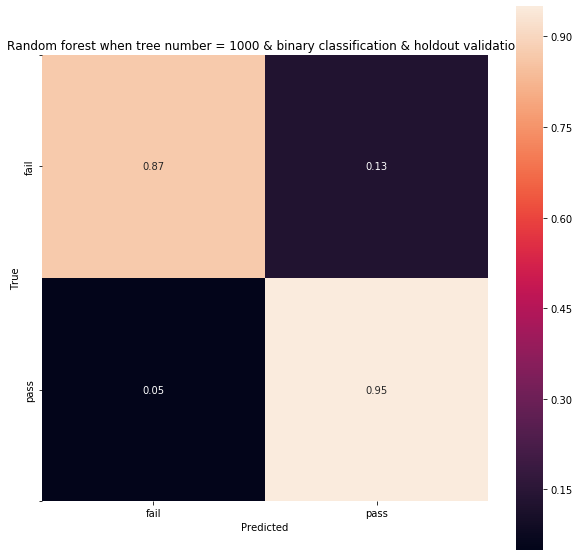

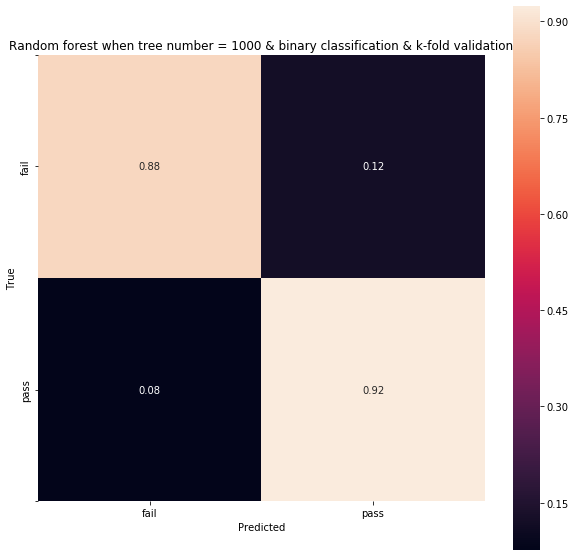

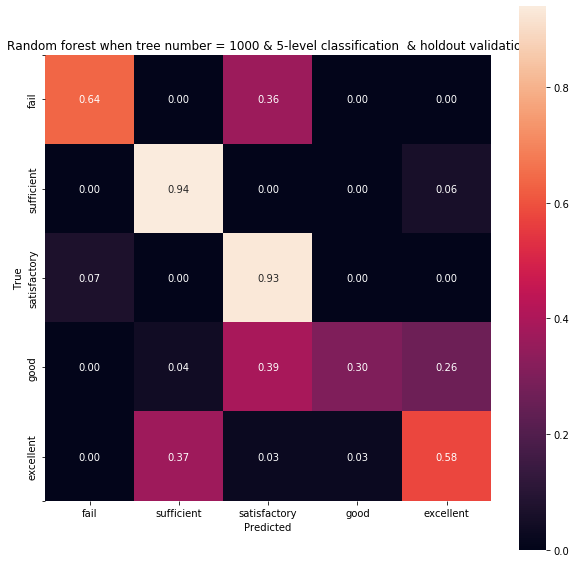

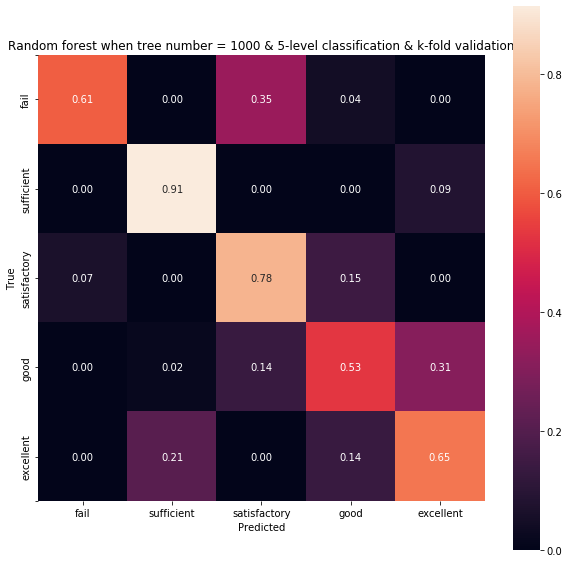


KNN : 


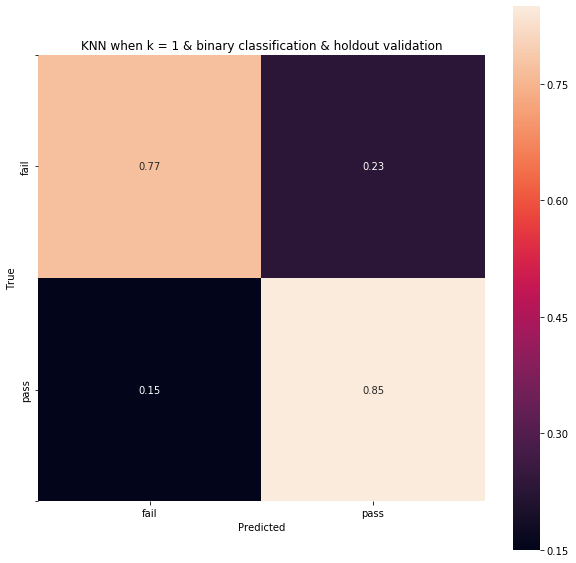

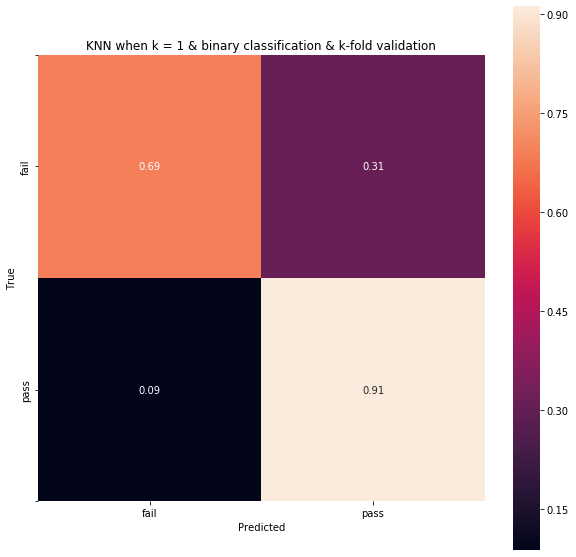

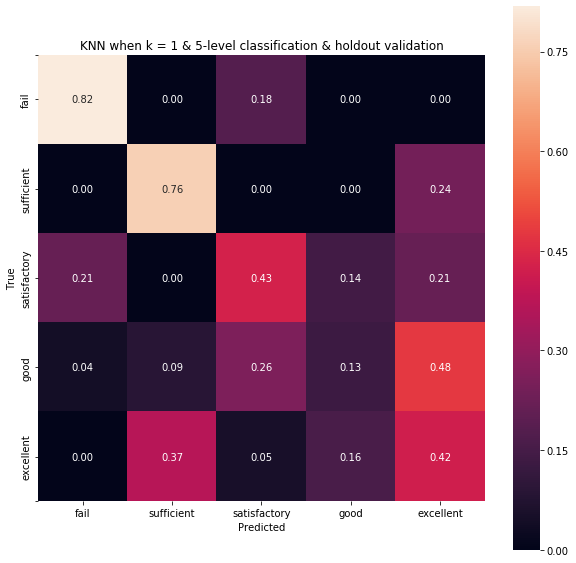

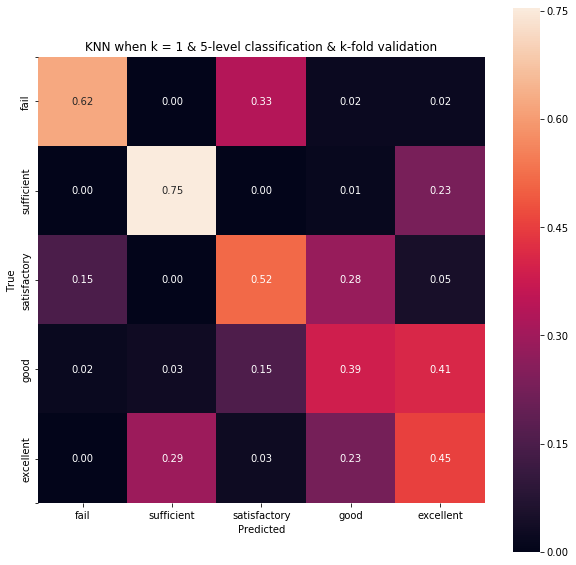

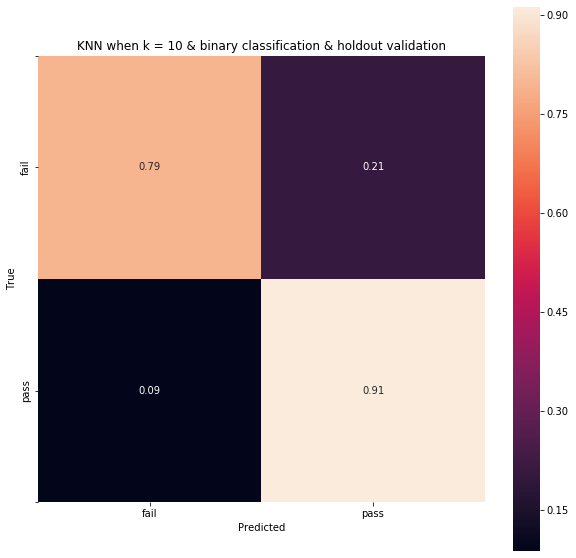

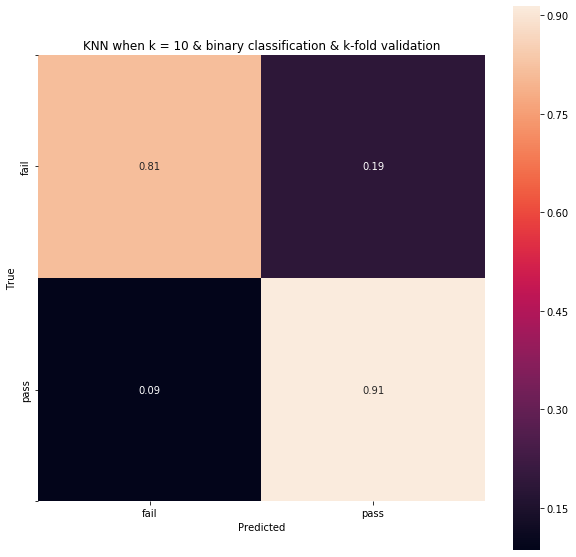

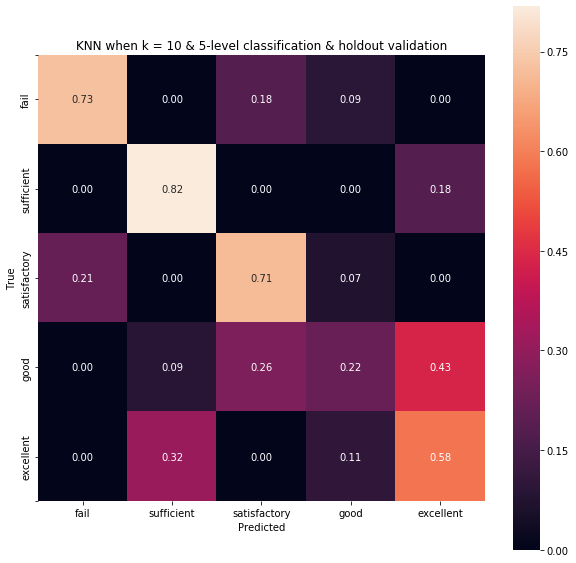

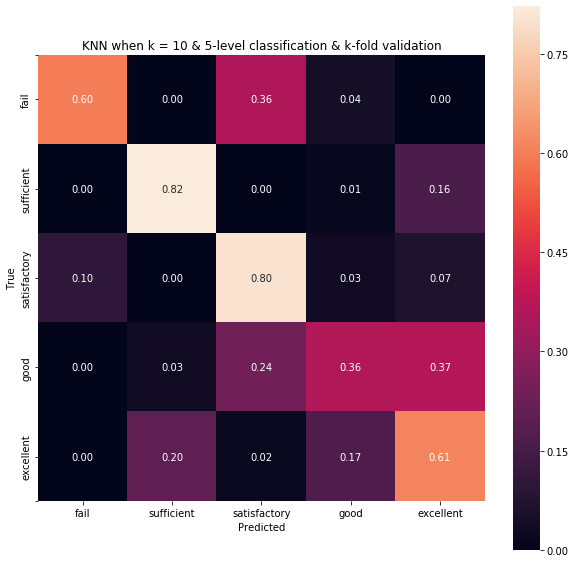

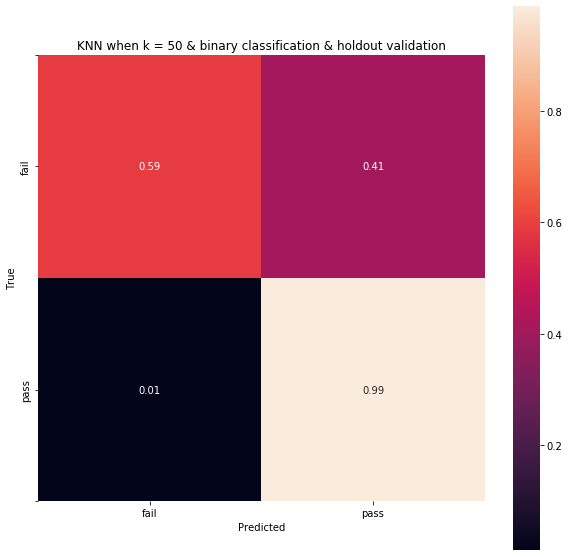

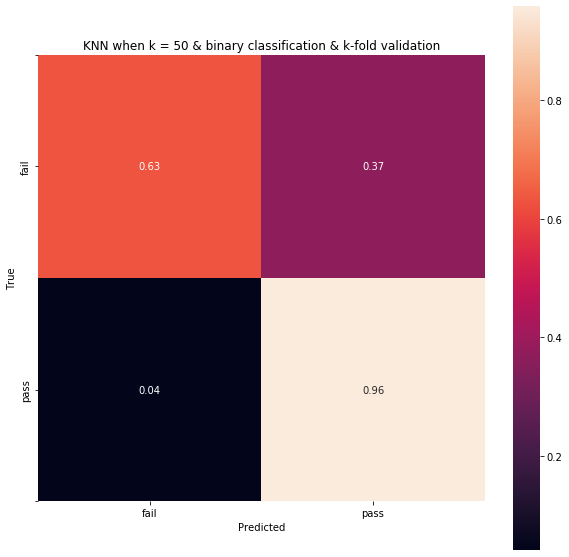

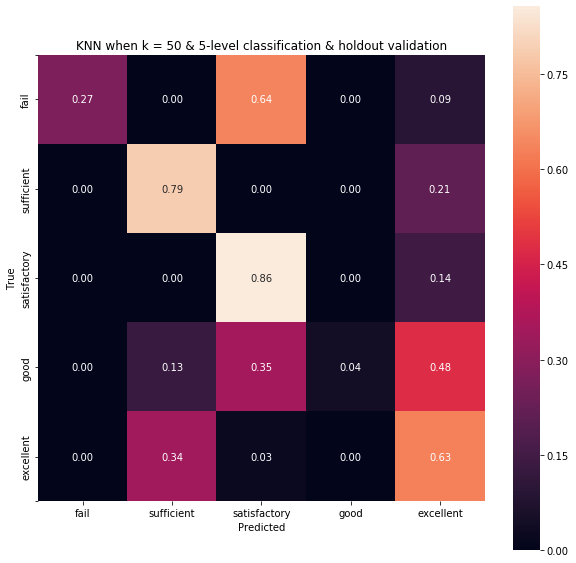

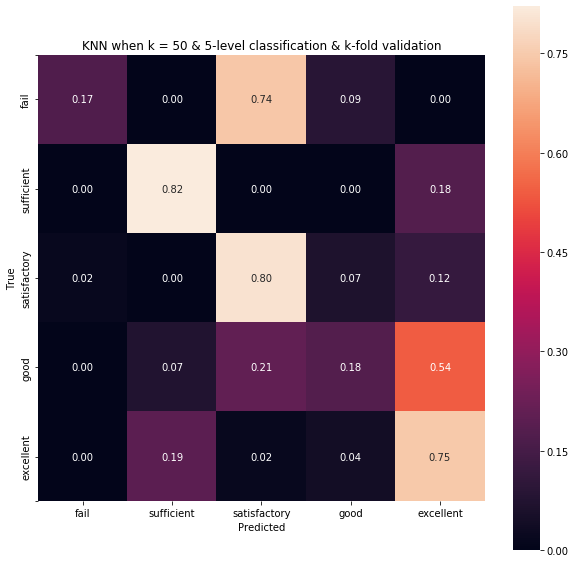


accuracy
Decision tree
accuracy of decision tree with binary classification & holdout validation :  0.8471153846153847
accuracy of decision tree with binary classification & k-fold validation :  0.8348218985586684
accuracy of decision tree with 5-level classification & holdout validation :  0.7154447383280336
accuracy of decision tree with 5-level classification & k-fold validation :  0.6609715303538831

Random forest
accuracy of random forest when tree number = 10 & binary classification & holdout validation :  0.8862179487179487
accuracy of random forest when tree number = 10 & binary classification & k-fold validation :  0.8998937721944621
accuracy of random forest when tree number = 10 & 5-level classification & holdout validation :  0.5713205939750563
accuracy of random forest when tree number = 10 & 5-level classification & k-fold validation :  0.6388045545545543
accuracy of random forest when tree number = 100 & binary classification & holdout validation :  0.9237179487179488
a

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sb
import pandas as pd
# 1. confusion matrix

# Decision Tree
print("Decision Tree : ")
# binary classification & hold out
plt.figure(figsize=(10,10))
tree_binary.fit(x_train_binary,y_train_binary)
confusion_dt_binary_holdout = confusion_matrix(y_test_binary, tree_binary.predict(x_test_binary), normalize = 'true')
sb.heatmap(confusion_dt_binary_holdout, annot = True, fmt = '.2f', square = True, xticklabels=['fail', 'pass'], yticklabels=[' ', 'fail', 'pass', ' '])
plt.yticks([0, 0.5, 1.5, 2], va = "center")
plt.ylabel("True")
plt.xlabel("Predicted")
plt.title("Decision Tree with binary classification & holdout validation")
plt.show()


# binary classification & k-fold
confusion_dt_binary_fold = 0
plt.figure(figsize=(10,10))
for i in range(0,len(math_data_binary_x),int(len(math_data_binary_x)/k)):
    if i + int(len(math_data_binary_x)/k) <= len(math_data_binary_x):
        test_x_now = math_data_binary_x[i:i+int(len(math_data_binary_x)/k)]
        train_x_now = math_data_binary_x[:i] + math_data_binary_x[i+int(len(math_data_binary_x)/k):]
        test_y_now = math_data_binary_y[i:i+int(len(math_data_binary_x)/k)]
        train_y_now = math_data_binary_y[:i] + math_data_binary_y[i+int(len(math_data_binary_y)/k):]
        tree_binary.fit(train_x_now, train_y_now)
        true_y = test_y_now
        pred_y = tree_binary.predict(test_x_now)
        confusion_dt_binary_fold += confusion_matrix(true_y, pred_y, normalize = 'true')

confusion_dt_binary_fold /= k
sb.heatmap(confusion_dt_binary_fold, annot = True, fmt = '.2f', square = True, xticklabels=['fail', 'pass'], yticklabels=[' ', 'fail', 'pass', ' '])

plt.yticks([0, 0.5, 1.5, 2], va = "center")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Decision Tree with binary classification & k-fold validation")
plt.show()

# 5-level classification & holdout
plt.figure(figsize=(10,10))
tree_level.fit(x_train_level,y_train_level)
confusion_dt_level_holdout = confusion_matrix(y_test_level, tree_level.predict(x_test_level), normalize = 'true')
sb.heatmap(confusion_dt_level_holdout, annot = True, fmt = '.2f', square = True, xticklabels=["fail","sufficient","satisfactory","good","excellent"], yticklabels=[' ', "fail", "sufficient", "satisfactory", "good", "excellent", ' '])
plt.yticks([0, 0.5, 1.5, 2.5, 3.5, 4.5, 5], va = "center")
plt.ylabel("True")
plt.xlabel("Predicted")
plt.title("Decision Tree with 5-level classification & holdout validation")
plt.show()

# 5-level classification & k-fold
confusion_dt_level_fold = 0
plt.figure(figsize=(10,10))
for i in range(0,len(math_data_level_x),int(len(math_data_level_x)/k)):
    if i + int(len(math_data_level_x)/k) <= len(math_data_level_x):
        test_x_now = math_data_level_x[i:i+int(len(math_data_level_x)/k)]
        train_x_now = math_data_level_x[:i] + math_data_level_x[i+int(len(math_data_level_x)/k):]
        test_y_now = math_data_level_y[i:i+int(len(math_data_level_x)/k)]
        train_y_now = math_data_level_y[:i] + math_data_level_y[i+int(len(math_data_level_y)/k):]
        tree_level.fit(train_x_now, train_y_now)
        true_y = test_y_now
        pred_y = tree_level.predict(test_x_now)
        confusion_dt_level_fold += confusion_matrix(true_y, pred_y, normalize = 'true')


confusion_dt_level_fold /= k
sb.heatmap(confusion_dt_level_fold, annot = True, fmt = '.2f', square = True, xticklabels=["fail","sufficient","satisfactory","good","excellent"], yticklabels=[' ', "fail", "sufficient", "satisfactory", "good", "excellent", ' '])

plt.yticks([0, 0.5, 1.5, 2.5, 3.5, 4.5, 5], va = "center")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Decision Tree with 5-level classification & k-fold validation")
plt.show()
print()



# Random forest
print("Random forest : ")

# random forest when tree number = 10
# binary classification & hold out
plt.figure(figsize=(10,10))
forest_10.fit(x_train_binary,y_train_binary)
confusion_forest10_binary_holdout = confusion_matrix(y_test_binary, forest_10.predict(x_test_binary), normalize = 'true')
sb.heatmap(confusion_forest10_binary_holdout, annot = True, fmt = '.2f', square = True, xticklabels=['fail', 'pass'], yticklabels=[' ', 'fail', 'pass', ' '])
plt.yticks([0, 0.5, 1.5, 2], va = "center")
plt.ylabel("True")
plt.xlabel("Predicted")
plt.title("Random forest when tree number = 10 & binary classification & holdout validation")
plt.show()

# binary classification & k-fold
confusion_forest10_binary_fold = 0
plt.figure(figsize=(10,10))
for i in range(0,len(math_data_binary_x),int(len(math_data_binary_x)/k)):
    if i + int(len(math_data_binary_x)/k) <= len(math_data_binary_x):
        test_x_now = math_data_binary_x[i:i+int(len(math_data_binary_x)/k)]
        train_x_now = math_data_binary_x[:i] + math_data_binary_x[i+int(len(math_data_binary_x)/k):]
        test_y_now = math_data_binary_y[i:i+int(len(math_data_binary_x)/k)]
        train_y_now = math_data_binary_y[:i] + math_data_binary_y[i+int(len(math_data_binary_y)/k):]
        forest_10.fit(train_x_now, train_y_now)
        true_y = test_y_now
        pred_y = forest_10.predict(test_x_now)
        confusion_forest10_binary_fold += confusion_matrix(true_y, pred_y, normalize = 'true')

confusion_forest10_binary_fold /= k
sb.heatmap(confusion_forest10_binary_fold, annot = True, fmt = '.2f', square = True, xticklabels=['fail', 'pass'], yticklabels=[' ', 'fail', 'pass', ' '])

plt.yticks([0, 0.5, 1.5, 2], va = "center")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Random forest when tree number = 10 & binary classification & k-fold validation")
plt.show()

# 5-level classification & holdout
plt.figure(figsize=(10,10))
forest_10.fit(x_train_level,y_train_level)
confusion_forest10_level_holdout = confusion_matrix(y_test_level, forest_10.predict(x_test_level), normalize = 'true')
sb.heatmap(confusion_forest10_level_holdout, annot = True, fmt = '.2f', square = True, xticklabels=["fail","sufficient","satisfactory","good","excellent"], yticklabels=[' ', "fail", "sufficient", "satisfactory", "good", "excellent", ' '])
plt.yticks([0, 0.5, 1.5, 2.5, 3.5, 4.5, 5], va = "center")
plt.ylabel("True")
plt.xlabel("Predicted")
plt.title("Random forest when tree number = 10 & 5-level classification & holdout validation")
plt.show()

# 5-level classification & k-fold
confusion_forest10_level_fold = 0
plt.figure(figsize=(10,10))
for i in range(0,len(math_data_level_x),int(len(math_data_level_x)/k)):
    if i + int(len(math_data_level_x)/k) <= len(math_data_level_x):
        test_x_now = math_data_level_x[i:i+int(len(math_data_level_x)/k)]
        train_x_now = math_data_level_x[:i] + math_data_level_x[i+int(len(math_data_level_x)/k):]
        test_y_now = math_data_level_y[i:i+int(len(math_data_level_x)/k)]
        train_y_now = math_data_level_y[:i] + math_data_level_y[i+int(len(math_data_level_y)/k):]
        forest_10.fit(train_x_now, train_y_now)
        true_y = test_y_now
        pred_y = forest_10.predict(test_x_now)
        confusion_forest10_level_fold += confusion_matrix(true_y, pred_y, normalize = 'true')


confusion_forest10_level_fold /= k
sb.heatmap(confusion_forest10_level_fold, annot = True, fmt = '.2f', square = True, xticklabels=["fail","sufficient","satisfactory","good","excellent"], yticklabels=[' ', "fail", "sufficient", "satisfactory", "good", "excellent", ' '])

plt.yticks([0, 0.5, 1.5, 2.5, 3.5, 4.5, 5], va = "center")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Random forest when tree number = 10 & 5-level classification & k-fold validation")
plt.show()



# random forest when tree number = 10
# binary classification & hold out
plt.figure(figsize=(10,10))
forest_100.fit(x_train_binary,y_train_binary)
confusion_forest100_binary_holdout = confusion_matrix(y_test_binary, forest_100.predict(x_test_binary), normalize = 'true')
sb.heatmap(confusion_forest100_binary_holdout, annot = True, fmt = '.2f', square = True, xticklabels=['fail', 'pass'], yticklabels=[' ', 'fail', 'pass', ' '])
plt.yticks([0, 0.5, 1.5, 2], va = "center")
plt.ylabel("True")
plt.xlabel("Predicted")
plt.title("Random forest when tree number = 100 & binary classification & holdout validation")
plt.show()

# binary classification & k-fold
confusion_forest100_binary_fold = 0
plt.figure(figsize=(10,10))
for i in range(0,len(math_data_binary_x),int(len(math_data_binary_x)/k)):
    if i + int(len(math_data_binary_x)/k) <= len(math_data_binary_x):
        test_x_now = math_data_binary_x[i:i+int(len(math_data_binary_x)/k)]
        train_x_now = math_data_binary_x[:i] + math_data_binary_x[i+int(len(math_data_binary_x)/k):]
        test_y_now = math_data_binary_y[i:i+int(len(math_data_binary_x)/k)]
        train_y_now = math_data_binary_y[:i] + math_data_binary_y[i+int(len(math_data_binary_y)/k):]
        forest_100.fit(train_x_now, train_y_now)
        true_y = test_y_now
        pred_y = forest_100.predict(test_x_now)
        confusion_forest100_binary_fold += confusion_matrix(true_y, pred_y, normalize = 'true')

confusion_forest100_binary_fold /= k
sb.heatmap(confusion_forest100_binary_fold, annot = True, fmt = '.2f', square = True, xticklabels=['fail', 'pass'], yticklabels=[' ', 'fail', 'pass', ' '])

plt.yticks([0, 0.5, 1.5, 2], va = "center")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Random forest when tree number = 100 & binary classification & k-fold validation")
plt.show()

# 5-level classification & holdout
plt.figure(figsize=(10,10))
forest_100.fit(x_train_level,y_train_level)
confusion_forest100_level_holdout = confusion_matrix(y_test_level, forest_100.predict(x_test_level), normalize = 'true')
sb.heatmap(confusion_forest100_level_holdout, annot = True, fmt = '.2f', square = True, xticklabels=["fail","sufficient","satisfactory","good","excellent"], yticklabels=[' ', "fail", "sufficient", "satisfactory", "good", "excellent", ' '])
plt.yticks([0, 0.5, 1.5, 2.5, 3.5, 4.5, 5], va = "center")
plt.ylabel("True")
plt.xlabel("Predicted")
plt.title("Random forest when tree number = 100 & 5-level classification & holdout validation")
plt.show()

# 5-level classification & k-fold
confusion_forest100_level_fold = 0
plt.figure(figsize=(10,10))
for i in range(0,len(math_data_level_x),int(len(math_data_level_x)/k)):
    if i + int(len(math_data_level_x)/k) <= len(math_data_level_x):
        test_x_now = math_data_level_x[i:i+int(len(math_data_level_x)/k)]
        train_x_now = math_data_level_x[:i] + math_data_level_x[i+int(len(math_data_level_x)/k):]
        test_y_now = math_data_level_y[i:i+int(len(math_data_level_x)/k)]
        train_y_now = math_data_level_y[:i] + math_data_level_y[i+int(len(math_data_level_y)/k):]
        forest_100.fit(train_x_now, train_y_now)
        true_y = test_y_now
        pred_y = forest_100.predict(test_x_now)
        confusion_forest100_level_fold += confusion_matrix(true_y, pred_y, normalize = 'true')


confusion_forest100_level_fold /= k
sb.heatmap(confusion_forest100_level_fold, annot = True, fmt = '.2f', square = True, xticklabels=["fail","sufficient","satisfactory","good","excellent"], yticklabels=[' ', "fail", "sufficient", "satisfactory", "good", "excellent", ' '])

plt.yticks([0, 0.5, 1.5, 2.5, 3.5, 4.5, 5], va = "center")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Random forest when tree number = 100 & 5-level classification & k-fold validation")
plt.show()



# random forest when tree number = 1000
# binary classification & hold out
plt.figure(figsize=(10,10))
forest_1000.fit(x_train_binary,y_train_binary)
confusion_forest1000_binary_holdout = confusion_matrix(y_test_binary, forest_1000.predict(x_test_binary), normalize = 'true')
sb.heatmap(confusion_forest1000_binary_holdout, annot = True, fmt = '.2f', square = True, xticklabels=['fail', 'pass'], yticklabels=[' ', 'fail', 'pass', ' '])
plt.yticks([0, 0.5, 1.5, 2], va = "center")
plt.ylabel("True")
plt.xlabel("Predicted")
plt.title("Random forest when tree number = 1000 & binary classification & holdout validation")
plt.show()

# binary classification & k-fold
confusion_forest1000_binary_fold = 0
plt.figure(figsize=(10,10))
for i in range(0,len(math_data_binary_x),int(len(math_data_binary_x)/k)):
    if i + int(len(math_data_binary_x)/k) <= len(math_data_binary_x):
        test_x_now = math_data_binary_x[i:i+int(len(math_data_binary_x)/k)]
        train_x_now = math_data_binary_x[:i] + math_data_binary_x[i+int(len(math_data_binary_x)/k):]
        test_y_now = math_data_binary_y[i:i+int(len(math_data_binary_x)/k)]
        train_y_now = math_data_binary_y[:i] + math_data_binary_y[i+int(len(math_data_binary_y)/k):]
        forest_1000.fit(train_x_now, train_y_now)
        true_y = test_y_now
        pred_y = forest_1000.predict(test_x_now)
        confusion_forest1000_binary_fold += confusion_matrix(true_y, pred_y, normalize = 'true')

confusion_forest1000_binary_fold /= k
sb.heatmap(confusion_forest1000_binary_fold, annot = True, fmt = '.2f', square = True, xticklabels=['fail', 'pass'], yticklabels=[' ', 'fail', 'pass', ' '])

plt.yticks([0, 0.5, 1.5, 2], va = "center")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Random forest when tree number = 1000 & binary classification & k-fold validation")
plt.show()

# 5-level classification & holdout
plt.figure(figsize=(10,10))
forest_1000.fit(x_train_level,y_train_level)
confusion_forest1000_level_holdout = confusion_matrix(y_test_level, forest_1000.predict(x_test_level), normalize = 'true')
sb.heatmap(confusion_forest1000_level_holdout, annot = True, fmt = '.2f', square = True, xticklabels=["fail","sufficient","satisfactory","good","excellent"], yticklabels=[' ', "fail", "sufficient", "satisfactory", "good", "excellent", ' '])
plt.yticks([0, 0.5, 1.5, 2.5, 3.5, 4.5, 5], va = "center")
plt.ylabel("True")
plt.xlabel("Predicted")
plt.title("Random forest when tree number = 1000 & 5-level classification  & holdout validation")
plt.show()

# 5-level classification & k-fold
confusion_forest1000_level_fold = 0
plt.figure(figsize=(10,10))
for i in range(0,len(math_data_level_x),int(len(math_data_level_x)/k)):
    if i + int(len(math_data_level_x)/k) <= len(math_data_level_x):
        test_x_now = math_data_level_x[i:i+int(len(math_data_level_x)/k)]
        train_x_now = math_data_level_x[:i] + math_data_level_x[i+int(len(math_data_level_x)/k):]
        test_y_now = math_data_level_y[i:i+int(len(math_data_level_x)/k)]
        train_y_now = math_data_level_y[:i] + math_data_level_y[i+int(len(math_data_level_y)/k):]
        forest_1000.fit(train_x_now, train_y_now)
        true_y = test_y_now
        pred_y = forest_1000.predict(test_x_now)
        confusion_forest1000_level_fold += confusion_matrix(true_y, pred_y, normalize = 'true')


confusion_forest1000_level_fold /= k
sb.heatmap(confusion_forest1000_level_fold, annot = True, fmt = '.2f', square = True, xticklabels=["fail","sufficient","satisfactory","good","excellent"], yticklabels=[' ', "fail", "sufficient", "satisfactory", "good", "excellent", ' '])

plt.yticks([0, 0.5, 1.5, 2.5, 3.5, 4.5, 5], va = "center")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Random forest when tree number = 1000 & 5-level classification & k-fold validation")
plt.show()
print()



# KNN
print("KNN : ")
# when k is 1
# binary classification & hold out
plt.figure(figsize=(10,10))
knn_1.fit(x_train_binary,y_train_binary)
confusion_knn1_binary_holdout = confusion_matrix(y_test_binary, knn_1.predict(x_test_binary), normalize = 'true')
sb.heatmap(confusion_knn1_binary_holdout, annot = True, fmt = '.2f', square = True, xticklabels=['fail', 'pass'], yticklabels=[' ', 'fail', 'pass', ' '])
plt.yticks([0, 0.5, 1.5, 2], va = "center")
plt.ylabel("True")
plt.xlabel("Predicted")
plt.title("KNN when k = 1 & binary classification & holdout validation")
plt.show()

# binary classification & k-fold
confusion_knn1_binary_fold = 0
plt.figure(figsize=(10,10))
for i in range(0,len(math_data_binary_x),int(len(math_data_binary_x)/k)):
    if i + int(len(math_data_binary_x)/k) <= len(math_data_binary_x):
        test_x_now = math_data_binary_x[i:i+int(len(math_data_binary_x)/k)]
        train_x_now = math_data_binary_x[:i] + math_data_binary_x[i+int(len(math_data_binary_x)/k):]
        test_y_now = math_data_binary_y[i:i+int(len(math_data_binary_x)/k)]
        train_y_now = math_data_binary_y[:i] + math_data_binary_y[i+int(len(math_data_binary_y)/k):]
        knn_1.fit(train_x_now, train_y_now)
        true_y = test_y_now
        pred_y = knn_1.predict(test_x_now)
        confusion_knn1_binary_fold += confusion_matrix(true_y, pred_y, normalize = 'true')

confusion_knn1_binary_fold /= k
sb.heatmap(confusion_knn1_binary_fold, annot = True, fmt = '.2f', square = True, xticklabels=['fail', 'pass'], yticklabels=[' ', 'fail', 'pass', ' '])

plt.yticks([0, 0.5, 1.5, 2], va = "center")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("KNN when k = 1 & binary classification & k-fold validation")
plt.show()

# 5-level classification & holdout
plt.figure(figsize=(10,10))
knn_1.fit(x_train_level,y_train_level)
confusion_knn1_level_holdout = confusion_matrix(y_test_level, knn_1.predict(x_test_level), normalize = 'true')
sb.heatmap(confusion_knn1_level_holdout, annot = True, fmt = '.2f', square = True, xticklabels=["fail","sufficient","satisfactory","good","excellent"], yticklabels=[' ', "fail", "sufficient", "satisfactory", "good", "excellent", ' '])
plt.yticks([0, 0.5, 1.5, 2.5, 3.5, 4.5, 5], va = "center")
plt.ylabel("True")
plt.xlabel("Predicted")
plt.title("KNN when k = 1 & 5-level classification & holdout validation")
plt.show()

# 5-level classification & k-fold
confusion_knn1_level_fold = 0
plt.figure(figsize=(10,10))
for i in range(0,len(math_data_level_x),int(len(math_data_level_x)/k)):
    if i + int(len(math_data_level_x)/k) <= len(math_data_level_x):
        test_x_now = math_data_level_x[i:i+int(len(math_data_level_x)/k)]
        train_x_now = math_data_level_x[:i] + math_data_level_x[i+int(len(math_data_level_x)/k):]
        test_y_now = math_data_level_y[i:i+int(len(math_data_level_x)/k)]
        train_y_now = math_data_level_y[:i] + math_data_level_y[i+int(len(math_data_level_y)/k):]
        knn_1.fit(train_x_now, train_y_now)
        true_y = test_y_now
        pred_y = knn_1.predict(test_x_now)
        confusion_knn1_level_fold += confusion_matrix(true_y, pred_y, normalize = 'true')


confusion_knn1_level_fold /= k
sb.heatmap(confusion_knn1_level_fold, annot = True, fmt = '.2f', square = True, xticklabels=["fail","sufficient","satisfactory","good","excellent"], yticklabels=[' ', "fail", "sufficient", "satisfactory", "good", "excellent", ' '])

plt.yticks([0, 0.5, 1.5, 2.5, 3.5, 4.5, 5], va = "center")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("KNN when k = 1 & 5-level classification & k-fold validation")
plt.show()


# when k is 10
# binary classification & hold out
plt.figure(figsize=(10,10))
knn_10.fit(x_train_binary,y_train_binary)
confusion_knn10_binary_holdout = confusion_matrix(y_test_binary, knn_10.predict(x_test_binary), normalize = 'true')
sb.heatmap(confusion_knn10_binary_holdout, annot = True, fmt = '.2f', square = True, xticklabels=['fail', 'pass'], yticklabels=[' ', 'fail', 'pass', ' '])
plt.yticks([0, 0.5, 1.5, 2], va = "center")
plt.ylabel("True")
plt.xlabel("Predicted")
plt.title("KNN when k = 10 & binary classification & holdout validation")
plt.show()

# binary classification & k-fold
confusion_knn10_binary_fold = 0
plt.figure(figsize=(10,10))
for i in range(0,len(math_data_binary_x),int(len(math_data_binary_x)/k)):
    if i + int(len(math_data_binary_x)/k) <= len(math_data_binary_x):
        test_x_now = math_data_binary_x[i:i+int(len(math_data_binary_x)/k)]
        train_x_now = math_data_binary_x[:i] + math_data_binary_x[i+int(len(math_data_binary_x)/k):]
        test_y_now = math_data_binary_y[i:i+int(len(math_data_binary_x)/k)]
        train_y_now = math_data_binary_y[:i] + math_data_binary_y[i+int(len(math_data_binary_y)/k):]
        knn_10.fit(train_x_now, train_y_now)
        true_y = test_y_now
        pred_y = knn_10.predict(test_x_now)
        confusion_knn10_binary_fold += confusion_matrix(true_y, pred_y, normalize = 'true')

confusion_knn10_binary_fold /= k
sb.heatmap(confusion_knn10_binary_fold, annot = True, fmt = '.2f', square = True, xticklabels=['fail', 'pass'], yticklabels=[' ', 'fail', 'pass', ' '])

plt.yticks([0, 0.5, 1.5, 2], va = "center")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("KNN when k = 10 & binary classification & k-fold validation")
plt.show()

# 5-level classification & holdout
plt.figure(figsize=(10,10))
knn_10.fit(x_train_level,y_train_level)
confusion_knn10_level_holdout = confusion_matrix(y_test_level, knn_10.predict(x_test_level), normalize = 'true')
sb.heatmap(confusion_knn10_level_holdout, annot = True, fmt = '.2f', square = True, xticklabels=["fail","sufficient","satisfactory","good","excellent"], yticklabels=[' ', "fail", "sufficient", "satisfactory", "good", "excellent", ' '])
plt.yticks([0, 0.5, 1.5, 2.5, 3.5, 4.5, 5], va = "center")
plt.ylabel("True")
plt.xlabel("Predicted")
plt.title("KNN when k = 10 & 5-level classification & holdout validation")
plt.show()

# 5-level classification & k-fold
confusion_knn10_level_fold = 0
plt.figure(figsize=(10,10))
for i in range(0,len(math_data_level_x),int(len(math_data_level_x)/k)):
    if i + int(len(math_data_level_x)/k) <= len(math_data_level_x):
        test_x_now = math_data_level_x[i:i+int(len(math_data_level_x)/k)]
        train_x_now = math_data_level_x[:i] + math_data_level_x[i+int(len(math_data_level_x)/k):]
        test_y_now = math_data_level_y[i:i+int(len(math_data_level_x)/k)]
        train_y_now = math_data_level_y[:i] + math_data_level_y[i+int(len(math_data_level_y)/k):]
        knn_10.fit(train_x_now, train_y_now)
        true_y = test_y_now
        pred_y = knn_10.predict(test_x_now)
        confusion_knn10_level_fold += confusion_matrix(true_y, pred_y, normalize = 'true')


confusion_knn10_level_fold /= k
sb.heatmap(confusion_knn10_level_fold, annot = True, fmt = '.2f', square = True, xticklabels=["fail","sufficient","satisfactory","good","excellent"], yticklabels=[' ', "fail", "sufficient", "satisfactory", "good", "excellent", ' '])

plt.yticks([0, 0.5, 1.5, 2.5, 3.5, 4.5, 5], va = "center")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("KNN when k = 10 & 5-level classification & k-fold validation")
plt.show()


# when k is 50
# binary classification & hold out
plt.figure(figsize=(10,10))
knn_50.fit(x_train_binary,y_train_binary)
confusion_knn50_binary_holdout = confusion_matrix(y_test_binary, knn_50.predict(x_test_binary), normalize = 'true')
sb.heatmap(confusion_knn50_binary_holdout, annot = True, fmt = '.2f', square = True, xticklabels=['fail', 'pass'], yticklabels=[' ', 'fail', 'pass', ' '])
plt.yticks([0, 0.5, 1.5, 2], va = "center")
plt.ylabel("True")
plt.xlabel("Predicted")
plt.title("KNN when k = 50 & binary classification & holdout validation")
plt.show()

# binary classification & k-fold
confusion_knn50_binary_fold = 0
plt.figure(figsize=(10,10))
for i in range(0,len(math_data_binary_x),int(len(math_data_binary_x)/k)):
    if i + int(len(math_data_binary_x)/k) <= len(math_data_binary_x):
        test_x_now = math_data_binary_x[i:i+int(len(math_data_binary_x)/k)]
        train_x_now = math_data_binary_x[:i] + math_data_binary_x[i+int(len(math_data_binary_x)/k):]
        test_y_now = math_data_binary_y[i:i+int(len(math_data_binary_x)/k)]
        train_y_now = math_data_binary_y[:i] + math_data_binary_y[i+int(len(math_data_binary_y)/k):]
        knn_50.fit(train_x_now, train_y_now)
        true_y = test_y_now
        pred_y = knn_50.predict(test_x_now)
        confusion_knn50_binary_fold += confusion_matrix(true_y, pred_y, normalize = 'true')

confusion_knn50_binary_fold /= k
sb.heatmap(confusion_knn50_binary_fold, annot = True, fmt = '.2f', square = True, xticklabels=['fail', 'pass'], yticklabels=[' ', 'fail', 'pass', ' '])

plt.yticks([0, 0.5, 1.5, 2], va = "center")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("KNN when k = 50 & binary classification & k-fold validation")
plt.show()

# 5-level classification & holdout
plt.figure(figsize=(10,10))
knn_50.fit(x_train_level,y_train_level)
confusion_knn50_level_holdout = confusion_matrix(y_test_level, knn_50.predict(x_test_level), normalize = 'true')
sb.heatmap(confusion_knn50_level_holdout, annot = True, fmt = '.2f', square = True, xticklabels=["fail","sufficient","satisfactory","good","excellent"], yticklabels=[' ', "fail", "sufficient", "satisfactory", "good", "excellent", ' '])
plt.yticks([0, 0.5, 1.5, 2.5, 3.5, 4.5, 5], va = "center")
plt.ylabel("True")
plt.xlabel("Predicted")
plt.title("KNN when k = 50 & 5-level classification & holdout validation")
plt.show()

# 5-level classification & k-fold
confusion_knn50_level_fold = 0
plt.figure(figsize=(10,10))
for i in range(0,len(math_data_level_x),int(len(math_data_level_x)/k)):
    if i + int(len(math_data_level_x)/k) <= len(math_data_level_x):
        test_x_now = math_data_level_x[i:i+int(len(math_data_level_x)/k)]
        train_x_now = math_data_level_x[:i] + math_data_level_x[i+int(len(math_data_level_x)/k):]
        test_y_now = math_data_level_y[i:i+int(len(math_data_level_x)/k)]
        train_y_now = math_data_level_y[:i] + math_data_level_y[i+int(len(math_data_level_y)/k):]
        knn_50.fit(train_x_now, train_y_now)
        true_y = test_y_now
        pred_y = knn_50.predict(test_x_now)
        confusion_knn50_level_fold += confusion_matrix(true_y, pred_y, normalize = 'true')


confusion_knn50_level_fold /= k
sb.heatmap(confusion_knn50_level_fold, annot = True, fmt = '.2f', square = True, xticklabels=["fail","sufficient","satisfactory","good","excellent"], yticklabels=[' ', "fail", "sufficient", "satisfactory", "good", "excellent", ' '])

plt.yticks([0, 0.5, 1.5, 2.5, 3.5, 4.5, 5], va = "center")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("KNN when k = 50 & 5-level classification & k-fold validation")
plt.show()
print()






# accuracy
print("accuracy")

# decision tree
print("Decision tree")
#accuracy of decision tree : binary classification & holdout validation

tmp_sum = 0
accuracy_dt_binary_holdout = 0
for i in range(2):
    accuracy_dt_binary_holdout += confusion_dt_binary_holdout[i][i]
    for j in range(2):
        tmp_sum += confusion_dt_binary_holdout[i][j]

accuracy_dt_binary_holdout = accuracy_dt_binary_holdout / tmp_sum
print("accuracy of decision tree with binary classification & holdout validation : ",accuracy_dt_binary_holdout)

#accuracy of decision tree : binary classification & k-fold
tmp_sum = 0
accuracy_dt_binary_fold = 0
for i in range(2):
    accuracy_dt_binary_fold += confusion_dt_binary_fold[i][i]
    for j in range(2):
        tmp_sum += confusion_dt_binary_fold[i][j]

accuracy_dt_binary_fold /= tmp_sum 
print("accuracy of decision tree with binary classification & k-fold validation : ",accuracy_dt_binary_fold)

#accuracy of decision tree : 5-level classification & k-fold
tmp_sum = 0
accuracy_dt_level_holdout = 0
for i in range(5):
    accuracy_dt_level_holdout +=  confusion_dt_level_holdout[i][i]
    for j in range(5):
        tmp_sum += confusion_dt_level_holdout[i][j]
accuracy_dt_level_holdout = accuracy_dt_level_holdout / tmp_sum
print("accuracy of decision tree with 5-level classification & holdout validation : ",accuracy_dt_level_holdout)

#accuracy of decision tree : 5-level classification & k-fold
tmp_sum = 0
accuracy_dt_level_fold = 0
for i in range(5):
    accuracy_dt_level_fold += confusion_dt_level_fold[i][i]
    for j in range(5):
        tmp_sum += confusion_dt_level_fold[i][j]

accuracy_dt_level_fold /= tmp_sum 
print("accuracy of decision tree with 5-level classification & k-fold validation : ",accuracy_dt_level_fold)
print()



# random forest
print("Random forest")

# random forest when tree number is 10
# accuracy of random forest with tree number = 10 : binary classification & holdout validation
tmp_sum = 0
accuracy_forest10_binary_holdout = 0
for i in range(2):
    accuracy_forest10_binary_holdout += confusion_forest10_binary_holdout[i][i]
    for j in range(2):
        tmp_sum += confusion_forest10_binary_holdout[i][j]

accuracy_forest10_binary_holdout /= tmp_sum
print("accuracy of random forest when tree number = 10 & binary classification & holdout validation : ",accuracy_forest10_binary_holdout)

#accuracy of random forest with tree number = 10: binary classification & k-fold
tmp_sum = 0
accuracy_forest10_binary_fold = 0
for i in range(2):
    accuracy_forest10_binary_fold += confusion_forest10_binary_fold[i][i]
    for j in range(2):
        tmp_sum += confusion_forest10_binary_fold[i][j]

accuracy_forest10_binary_fold /= tmp_sum
print("accuracy of random forest when tree number = 10 & binary classification & k-fold validation : ",accuracy_forest10_binary_fold)

#accuracy of random forest with tree number = 10: 5-level classificWation & holdout
tmp_sum = 0
accuracy_forest10_level_holdout = 0
for i in range(5):
    accuracy_forest10_level_holdout +=  confusion_forest10_level_holdout[i][i]
    for j in range(5):
        tmp_sum += confusion_forest10_level_holdout[i][j]
accuracy_forest10_level_holdout /= tmp_sum
print("accuracy of random forest when tree number = 10 & 5-level classification & holdout validation : ",accuracy_forest10_level_holdout)

#accuracy of random forest with tree number = 10: 5-level classification & k-fold
tmp_sum = 0
accuracy_forest10_level_fold = 0
for i in range(5):
    accuracy_forest10_level_fold +=  confusion_forest10_level_fold[i][i]
    for j in range(5):
        tmp_sum += confusion_forest10_level_fold[i][j]
accuracy_forest10_level_fold /= tmp_sum
print("accuracy of random forest when tree number = 10 & 5-level classification & k-fold validation : ",accuracy_forest10_level_fold)


# random forest when tree number is 100
# accuracy of random forest with tree number = 100 : binary classification & holdout validation
tmp_sum = 0
accuracy_forest100_binary_holdout = 0
for i in range(2):
    accuracy_forest100_binary_holdout += confusion_forest100_binary_holdout[i][i]
    for j in range(2):
        tmp_sum += confusion_forest100_binary_holdout[i][j]

accuracy_forest100_binary_holdout /= tmp_sum
print("accuracy of random forest when tree number = 100 & binary classification & holdout validation : ",accuracy_forest100_binary_holdout)

#accuracy of random forest with tree number = 100: binary classification & k-fold
tmp_sum = 0
accuracy_forest100_binary_fold = 0
for i in range(2):
    accuracy_forest100_binary_fold += confusion_forest100_binary_fold[i][i]
    for j in range(2):
        tmp_sum += confusion_forest100_binary_fold[i][j]

accuracy_forest100_binary_fold /= tmp_sum
print("accuracy of random forest when tree number = 100 & binary classification & k-fold validation : ",accuracy_forest100_binary_fold)

#accuracy of random forest with tree number = 100: 5-level classificWation & holdout
tmp_sum = 0
accuracy_forest100_level_holdout = 0
for i in range(5):
    accuracy_forest100_level_holdout +=  confusion_forest100_level_holdout[i][i]
    for j in range(5):
        tmp_sum += confusion_forest100_level_holdout[i][j]
accuracy_forest100_level_holdout /= tmp_sum
print("accuracy of random forest when tree number = 100 & 5-level classification & holdout validation : ",accuracy_forest100_level_holdout)

#accuracy of random forest with tree number = 100: 5-level classification & k-fold
tmp_sum = 0
accuracy_forest100_level_fold = 0
for i in range(5):
    accuracy_forest100_level_fold +=  confusion_forest100_level_fold[i][i]
    for j in range(5):
        tmp_sum += confusion_forest100_level_fold[i][j]
accuracy_forest100_level_fold /= tmp_sum
print("accuracy of random forest when tree number = 100 & 5-level classification & k-fold validation : ",accuracy_forest100_level_fold)


# random forest when tree number is 1000
# accuracy of random forest with tree number = 1000 : binary classification & holdout validation
tmp_sum = 0
accuracy_forest1000_binary_holdout = 0
for i in range(2):
    accuracy_forest1000_binary_holdout += confusion_forest1000_binary_holdout[i][i]
    for j in range(2):
        tmp_sum += confusion_forest1000_binary_holdout[i][j]

accuracy_forest1000_binary_holdout /= tmp_sum
print("accuracy of random forest when tree number = 1000 & binary classification & holdout validation : ",accuracy_forest1000_binary_holdout)

#accuracy of random forest with tree number = 1000: binary classification & k-fold
tmp_sum = 0
accuracy_forest1000_binary_fold = 0
for i in range(2):
    accuracy_forest1000_binary_fold += confusion_forest1000_binary_fold[i][i]
    for j in range(2):
        tmp_sum += confusion_forest1000_binary_fold[i][j]

accuracy_forest1000_binary_fold /= tmp_sum
print("accuracy of random forest when tree number = 1000 & binary classification & k-fold validation : ",accuracy_forest1000_binary_fold)

#accuracy of random forest with tree number = 1000: 5-level classificWation & holdout
tmp_sum = 0
accuracy_forest1000_level_holdout = 0
for i in range(5):
    accuracy_forest1000_level_holdout +=  confusion_forest1000_level_holdout[i][i]
    for j in range(5):
        tmp_sum += confusion_forest1000_level_holdout[i][j]
accuracy_forest1000_level_holdout /= tmp_sum
print("accuracy of random forest when tree number = 1000 & 5-level classification & holdout validation : ",accuracy_forest1000_level_holdout)

#accuracy of random forest with tree number = 1000: 5-level classification & k-fold
tmp_sum = 0
accuracy_forest1000_level_fold = 0
for i in range(5):
    accuracy_forest1000_level_fold +=  confusion_forest1000_level_fold[i][i]
    for j in range(5):
        tmp_sum += confusion_forest1000_level_fold[i][j]
accuracy_forest1000_level_fold /= tmp_sum
print("accuracy of random forest when tree number = 1000 & 5-level classification & k-fold validation : ",accuracy_forest1000_level_fold)
print()

# KNN
print("KNN")

# KNN when k is 1
# accuracy of KNN with k = 1 : binary classification & holdout validation
tmp_sum = 0
accuracy_knn1_binary_holdout = 0
for i in range(2):
    accuracy_knn1_binary_holdout += confusion_knn1_binary_holdout[i][i]
    for j in range(2):
        tmp_sum += confusion_knn1_binary_holdout[i][j]

accuracy_knn1_binary_holdout /= tmp_sum
print("accuracy of KNN when k = 1 & binary classification & holdout validation : ",accuracy_knn1_binary_holdout)

# accuracy of KNN with k = 1 : binary classification & k-fold validation
tmp_sum = 0
accuracy_knn1_binary_fold = 0
for i in range(2):
    accuracy_knn1_binary_fold += confusion_knn1_binary_fold[i][i]
    for j in range(2):
        tmp_sum += confusion_knn1_binary_fold[i][j]

accuracy_knn1_binary_fold /= tmp_sum
print("accuracy of KNN when k = 1 & binary classification & k-fold validation : ",accuracy_knn1_binary_fold)

# accuracy of KNN with k = 1 : 5-level classification & holdout validation
tmp_sum = 0
accuracy_knn1_level_holdout = 0
for i in range(5):
    accuracy_knn1_level_holdout += confusion_knn1_level_holdout[i][i]
    for j in range(5):
        tmp_sum += confusion_knn1_level_holdout[i][j]

accuracy_knn1_level_holdout /= tmp_sum
print("accuracy of KNN when k = 1 & 5-level classification & holdout validation : ",accuracy_knn1_level_holdout)

# accuracy of KNN with k = 1 : 5-level classification & k-fold validation
tmp_sum = 0
accuracy_knn1_level_fold = 0
for i in range(5):
    accuracy_knn1_level_fold += confusion_knn1_level_fold[i][i]
    for j in range(5):
        tmp_sum += confusion_knn1_level_fold[i][j]

accuracy_knn1_level_fold /= tmp_sum
print("accuracy of KNN when k = 1 & 5-level classification & k-fold validation : ",accuracy_knn1_level_fold)

# KNN when k is 10
# accuracy of KNN with k = 10 : binary classification & holdout validation
tmp_sum = 0
accuracy_knn10_binary_holdout = 0
for i in range(2):
    accuracy_knn10_binary_holdout += confusion_knn10_binary_holdout[i][i]
    for j in range(2):
        tmp_sum += confusion_knn10_binary_holdout[i][j]

accuracy_knn10_binary_holdout /= tmp_sum
print("accuracy of KNN when k = 10 & binary classification & holdout validation : ",accuracy_knn10_binary_holdout)

# accuracy of KNN with k = 10 : binary classification & k-fold validation
tmp_sum = 0
accuracy_knn10_binary_fold = 0
for i in range(2):
    accuracy_knn10_binary_fold += confusion_knn10_binary_fold[i][i]
    for j in range(2):
        tmp_sum += confusion_knn10_binary_fold[i][j]

accuracy_knn10_binary_fold /= tmp_sum
print("accuracy of KNN when k = 10 & binary classification & k-fold validation : ",accuracy_knn10_binary_fold)

# accuracy of KNN with k = 10 : 5-level classification & holdout validation
tmp_sum = 0
accuracy_knn10_level_holdout = 0
for i in range(5):
    accuracy_knn10_level_holdout += confusion_knn10_level_holdout[i][i]
    for j in range(5):
        tmp_sum += confusion_knn10_level_holdout[i][j]

accuracy_knn10_level_holdout /= tmp_sum
print("accuracy of KNN when k = 10 & 5-level classification & holdout validation : ",accuracy_knn10_level_holdout)

# accuracy of KNN with k = 10 : 5-level classification & k-fold validation
tmp_sum = 0
accuracy_knn10_level_fold = 0
for i in range(5):
    accuracy_knn10_level_fold += confusion_knn10_level_fold[i][i]
    for j in range(5):
        tmp_sum += confusion_knn10_level_fold[i][j]

accuracy_knn10_level_fold /= tmp_sum
print("accuracy of KNN when k = 10 & 5-level classification & k-fold validation : ",accuracy_knn10_level_fold)


# KNN when k is 50
# accuracy of KNN with k = 50 : binary classification & holdout validation
tmp_sum = 0
accuracy_knn50_binary_holdout = 0
for i in range(2):
    accuracy_knn50_binary_holdout += confusion_knn50_binary_holdout[i][i]
    for j in range(2):
        tmp_sum += confusion_knn50_binary_holdout[i][j]

accuracy_knn50_binary_holdout /= tmp_sum
print("accuracy of KNN when k = 50 & binary classification & holdout validation : ",accuracy_knn50_binary_holdout)

# accuracy of KNN with k = 50 : binary classification & k-fold validation
tmp_sum = 0
accuracy_knn50_binary_fold = 0
for i in range(2):
    accuracy_knn50_binary_fold += confusion_knn50_binary_fold[i][i]
    for j in range(2):
        tmp_sum += confusion_knn50_binary_fold[i][j]

accuracy_knn50_binary_fold /= tmp_sum
print("accuracy of KNN when k = 50 & binary classification & k-fold validation : ",accuracy_knn50_binary_fold)

# accuracy of KNN with k = 50 : 5-level classification & holdout validation
tmp_sum = 0
accuracy_knn50_level_holdout = 0
for i in range(5):
    accuracy_knn50_level_holdout += confusion_knn50_level_holdout[i][i]
    for j in range(5):
        tmp_sum += confusion_knn50_level_holdout[i][j]

accuracy_knn50_level_holdout /= tmp_sum
print("accuracy of KNN when k = 50 & 5-level classification & holdout validation : ",accuracy_knn50_level_holdout)

# accuracy of KNN with k = 50 : 5-level classification & k-fold validation
tmp_sum = 0
accuracy_knn50_level_fold = 0
for i in range(5):
    accuracy_knn50_level_fold += confusion_knn50_level_fold[i][i]
    for j in range(5):
        tmp_sum += confusion_knn50_level_fold[i][j]

accuracy_knn50_level_fold /= tmp_sum
print("accuracy of KNN when k = 50 & 5-level classification & k-fold validation : ",accuracy_knn50_level_fold)
print()




# recall
print("recall")

# decision tree
print("Decision tree")
# recall of decision tree : binary classification & holdout validation

tmp_sum = 0
recall_dt_binary_holdout = 0
for i in range(2):
    recall_dt_binary_holdout += confusion_dt_binary_holdout[i][i]
    for j in range(2):
        tmp_sum += confusion_dt_binary_holdout[i][j]

accuracy_dt_binary_holdout = accuracy_dt_binary_holdout / tmp_sum
print("accuracy of decision tree with binary classification & holdout validation : ",accuracy_dt_binary_holdout)

#accuracy of decision tree : binary classification & k-fold
tmp_sum = 0
accuracy_dt_binary_fold = 0
for i in range(2):
    accuracy_dt_binary_fold += confusion_dt_binary_fold[i][i]
    for j in range(2):
        tmp_sum += confusion_dt_binary_fold[i][j]

accuracy_dt_binary_fold /= tmp_sum 
print("accuracy of decision tree with binary classification & k-fold validation : ",accuracy_dt_binary_fold)

#accuracy of decision tree : 5-level classification & k-fold
tmp_sum = 0
accuracy_dt_level_holdout = 0
for i in range(5):
    accuracy_dt_level_holdout +=  confusion_dt_level_holdout[i][i]
    for j in range(5):
        tmp_sum += confusion_dt_level_holdout[i][j]
accuracy_dt_level_holdout = accuracy_dt_level_holdout / tmp_sum
print("accuracy of decision tree with 5-level classification & holdout validation : ",accuracy_dt_level_holdout)

#accuracy of decision tree : 5-level classification & k-fold
tmp_sum = 0
accuracy_dt_level_fold = 0
for i in range(5):
    accuracy_dt_level_fold += confusion_dt_level_fold[i][i]
    for j in range(5):
        tmp_sum += confusion_dt_level_fold[i][j]

accuracy_dt_level_fold /= tmp_sum 
print("accuracy of decision tree with 5-level classification & k-fold validation : ",accuracy_dt_level_fold)
print()



# random forest
print("Random forest")

# random forest when tree number is 10
# accuracy of random forest with tree number = 10 : binary classification & holdout validation
tmp_sum = 0
accuracy_forest10_binary_holdout = 0
for i in range(2):
    accuracy_forest10_binary_holdout += confusion_forest10_binary_holdout[i][i]
    for j in range(2):
        tmp_sum += confusion_forest10_binary_holdout[i][j]

accuracy_forest10_binary_holdout /= tmp_sum
print("accuracy of random forest when tree number = 10 & binary classification & holdout validation : ",accuracy_forest10_binary_holdout)

#accuracy of random forest with tree number = 10: binary classification & k-fold
tmp_sum = 0
accuracy_forest10_binary_fold = 0
for i in range(2):
    accuracy_forest10_binary_fold += confusion_forest10_binary_fold[i][i]
    for j in range(2):
        tmp_sum += confusion_forest10_binary_fold[i][j]

accuracy_forest10_binary_fold /= tmp_sum
print("accuracy of random forest when tree number = 10 & binary classification & k-fold validation : ",accuracy_forest10_binary_fold)

#accuracy of random forest with tree number = 10: 5-level classificWation & holdout
tmp_sum = 0
accuracy_forest10_level_holdout = 0
for i in range(5):
    accuracy_forest10_level_holdout +=  confusion_forest10_level_holdout[i][i]
    for j in range(5):
        tmp_sum += confusion_forest10_level_holdout[i][j]
accuracy_forest10_level_holdout /= tmp_sum
print("accuracy of random forest when tree number = 10 & 5-level classification & holdout validation : ",accuracy_forest10_level_holdout)

#accuracy of random forest with tree number = 10: 5-level classification & k-fold
tmp_sum = 0
accuracy_forest10_level_fold = 0
for i in range(5):
    accuracy_forest10_level_fold +=  confusion_forest10_level_fold[i][i]
    for j in range(5):
        tmp_sum += confusion_forest10_level_fold[i][j]
accuracy_forest10_level_fold /= tmp_sum
print("accuracy of random forest when tree number = 10 & 5-level classification & k-fold validation : ",accuracy_forest10_level_fold)


# random forest when tree number is 100
# accuracy of random forest with tree number = 100 : binary classification & holdout validation
tmp_sum = 0
accuracy_forest100_binary_holdout = 0
for i in range(2):
    accuracy_forest100_binary_holdout += confusion_forest100_binary_holdout[i][i]
    for j in range(2):
        tmp_sum += confusion_forest100_binary_holdout[i][j]

accuracy_forest100_binary_holdout /= tmp_sum
print("accuracy of random forest when tree number = 100 & binary classification & holdout validation : ",accuracy_forest100_binary_holdout)

#accuracy of random forest with tree number = 100: binary classification & k-fold
tmp_sum = 0
accuracy_forest100_binary_fold = 0
for i in range(2):
    accuracy_forest100_binary_fold += confusion_forest100_binary_fold[i][i]
    for j in range(2):
        tmp_sum += confusion_forest100_binary_fold[i][j]

accuracy_forest100_binary_fold /= tmp_sum
print("accuracy of random forest when tree number = 100 & binary classification & k-fold validation : ",accuracy_forest100_binary_fold)

#accuracy of random forest with tree number = 100: 5-level classificWation & holdout
tmp_sum = 0
accuracy_forest100_level_holdout = 0
for i in range(5):
    accuracy_forest100_level_holdout +=  confusion_forest100_level_holdout[i][i]
    for j in range(5):
        tmp_sum += confusion_forest100_level_holdout[i][j]
accuracy_forest100_level_holdout /= tmp_sum
print("accuracy of random forest when tree number = 100 & 5-level classification & holdout validation : ",accuracy_forest100_level_holdout)

#accuracy of random forest with tree number = 100: 5-level classification & k-fold
tmp_sum = 0
accuracy_forest100_level_fold = 0
for i in range(5):
    accuracy_forest100_level_fold +=  confusion_forest100_level_fold[i][i]
    for j in range(5):
        tmp_sum += confusion_forest100_level_fold[i][j]
accuracy_forest100_level_fold /= tmp_sum
print("accuracy of random forest when tree number = 100 & 5-level classification & k-fold validation : ",accuracy_forest100_level_fold)


# random forest when tree number is 1000
# accuracy of random forest with tree number = 1000 : binary classification & holdout validation
tmp_sum = 0
accuracy_forest1000_binary_holdout = 0
for i in range(2):
    accuracy_forest1000_binary_holdout += confusion_forest1000_binary_holdout[i][i]
    for j in range(2):
        tmp_sum += confusion_forest1000_binary_holdout[i][j]

accuracy_forest1000_binary_holdout /= tmp_sum
print("accuracy of random forest when tree number = 1000 & binary classification & holdout validation : ",accuracy_forest1000_binary_holdout)

#accuracy of random forest with tree number = 1000: binary classification & k-fold
tmp_sum = 0
accuracy_forest1000_binary_fold = 0
for i in range(2):
    accuracy_forest1000_binary_fold += confusion_forest1000_binary_fold[i][i]
    for j in range(2):
        tmp_sum += confusion_forest1000_binary_fold[i][j]

accuracy_forest1000_binary_fold /= tmp_sum
print("accuracy of random forest when tree number = 1000 & binary classification & k-fold validation : ",accuracy_forest1000_binary_fold)

#accuracy of random forest with tree number = 1000: 5-level classificWation & holdout
tmp_sum = 0
accuracy_forest1000_level_holdout = 0
for i in range(5):
    accuracy_forest1000_level_holdout +=  confusion_forest1000_level_holdout[i][i]
    for j in range(5):
        tmp_sum += confusion_forest1000_level_holdout[i][j]
accuracy_forest1000_level_holdout /= tmp_sum
print("accuracy of random forest when tree number = 1000 & 5-level classification & holdout validation : ",accuracy_forest1000_level_holdout)

#accuracy of random forest with tree number = 1000: 5-level classification & k-fold
tmp_sum = 0
accuracy_forest1000_level_fold = 0
for i in range(5):
    accuracy_forest1000_level_fold +=  confusion_forest1000_level_fold[i][i]
    for j in range(5):
        tmp_sum += confusion_forest1000_level_fold[i][j]
accuracy_forest1000_level_fold /= tmp_sum
print("accuracy of random forest when tree number = 1000 & 5-level classification & k-fold validation : ",accuracy_forest1000_level_fold)
print()

# KNN
print("KNN")

# KNN when k is 1
# accuracy of KNN with k = 1 : binary classification & holdout validation
tmp_sum = 0
accuracy_knn1_binary_holdout = 0
for i in range(2):
    accuracy_knn1_binary_holdout += confusion_knn1_binary_holdout[i][i]
    for j in range(2):
        tmp_sum += confusion_knn1_binary_holdout[i][j]

accuracy_knn1_binary_holdout /= tmp_sum
print("accuracy of KNN when k = 1 & binary classification & holdout validation : ",accuracy_knn1_binary_holdout)

# accuracy of KNN with k = 1 : binary classification & k-fold validation
tmp_sum = 0
accuracy_knn1_binary_fold = 0
for i in range(2):
    accuracy_knn1_binary_fold += confusion_knn1_binary_fold[i][i]
    for j in range(2):
        tmp_sum += confusion_knn1_binary_fold[i][j]

accuracy_knn1_binary_fold /= tmp_sum
print("accuracy of KNN when k = 1 & binary classification & k-fold validation : ",accuracy_knn1_binary_fold)

# accuracy of KNN with k = 1 : 5-level classification & holdout validation
tmp_sum = 0
accuracy_knn1_level_holdout = 0
for i in range(5):
    accuracy_knn1_level_holdout += confusion_knn1_level_holdout[i][i]
    for j in range(5):
        tmp_sum += confusion_knn1_level_holdout[i][j]

accuracy_knn1_level_holdout /= tmp_sum
print("accuracy of KNN when k = 1 & 5-level classification & holdout validation : ",accuracy_knn1_level_holdout)

# accuracy of KNN with k = 1 : 5-level classification & k-fold validation
tmp_sum = 0
accuracy_knn1_level_fold = 0
for i in range(5):
    accuracy_knn1_level_fold += confusion_knn1_level_fold[i][i]
    for j in range(5):
        tmp_sum += confusion_knn1_level_fold[i][j]

accuracy_knn1_level_fold /= tmp_sum
print("accuracy of KNN when k = 1 & 5-level classification & k-fold validation : ",accuracy_knn1_level_fold)

# KNN when k is 10
# accuracy of KNN with k = 10 : binary classification & holdout validation
tmp_sum = 0
accuracy_knn10_binary_holdout = 0
for i in range(2):
    accuracy_knn10_binary_holdout += confusion_knn10_binary_holdout[i][i]
    for j in range(2):
        tmp_sum += confusion_knn10_binary_holdout[i][j]

accuracy_knn10_binary_holdout /= tmp_sum
print("accuracy of KNN when k = 10 & binary classification & holdout validation : ",accuracy_knn10_binary_holdout)

# accuracy of KNN with k = 10 : binary classification & k-fold validation
tmp_sum = 0
accuracy_knn10_binary_fold = 0
for i in range(2):
    accuracy_knn10_binary_fold += confusion_knn10_binary_fold[i][i]
    for j in range(2):
        tmp_sum += confusion_knn10_binary_fold[i][j]

accuracy_knn10_binary_fold /= tmp_sum
print("accuracy of KNN when k = 10 & binary classification & k-fold validation : ",accuracy_knn10_binary_fold)

# accuracy of KNN with k = 10 : 5-level classification & holdout validation
tmp_sum = 0
accuracy_knn10_level_holdout = 0
for i in range(5):
    accuracy_knn10_level_holdout += confusion_knn10_level_holdout[i][i]
    for j in range(5):
        tmp_sum += confusion_knn10_level_holdout[i][j]

accuracy_knn10_level_holdout /= tmp_sum
print("accuracy of KNN when k = 10 & 5-level classification & holdout validation : ",accuracy_knn10_level_holdout)

# accuracy of KNN with k = 10 : 5-level classification & k-fold validation
tmp_sum = 0
accuracy_knn10_level_fold = 0
for i in range(5):
    accuracy_knn10_level_fold += confusion_knn10_level_fold[i][i]
    for j in range(5):
        tmp_sum += confusion_knn10_level_fold[i][j]

accuracy_knn10_level_fold /= tmp_sum
print("accuracy of KNN when k = 10 & 5-level classification & k-fold validation : ",accuracy_knn10_level_fold)


# KNN when k is 50
# accuracy of KNN with k = 50 : binary classification & holdout validation
tmp_sum = 0
accuracy_knn50_binary_holdout = 0
for i in range(2):
    accuracy_knn50_binary_holdout += confusion_knn50_binary_holdout[i][i]
    for j in range(2):
        tmp_sum += confusion_knn50_binary_holdout[i][j]

accuracy_knn50_binary_holdout /= tmp_sum
print("accuracy of KNN when k = 50 & binary classification & holdout validation : ",accuracy_knn50_binary_holdout)

# accuracy of KNN with k = 50 : binary classification & k-fold validation
tmp_sum = 0
accuracy_knn50_binary_fold = 0
for i in range(2):
    accuracy_knn50_binary_fold += confusion_knn50_binary_fold[i][i]
    for j in range(2):
        tmp_sum += confusion_knn50_binary_fold[i][j]

accuracy_knn50_binary_fold /= tmp_sum
print("accuracy of KNN when k = 50 & binary classification & k-fold validation : ",accuracy_knn50_binary_fold)

# accuracy of KNN with k = 50 : 5-level classification & holdout validation
tmp_sum = 0
accuracy_knn50_level_holdout = 0
for i in range(5):
    accuracy_knn50_level_holdout += confusion_knn50_level_holdout[i][i]
    for j in range(5):
        tmp_sum += confusion_knn50_level_holdout[i][j]

accuracy_knn50_level_holdout /= tmp_sum
print("accuracy of KNN when k = 50 & 5-level classification & holdout validation : ",accuracy_knn50_level_holdout)

# accuracy of KNN with k = 50 : 5-level classification & k-fold validation
tmp_sum = 0
accuracy_knn50_level_fold = 0
for i in range(5):
    accuracy_knn50_level_fold += confusion_knn50_level_fold[i][i]
    for j in range(5):
        tmp_sum += confusion_knn50_level_fold[i][j]

accuracy_knn50_level_fold /= tmp_sum
print("accuracy of KNN when k = 50 & 5-level classification & k-fold validation : ",accuracy_knn50_level_fold)

## 7. question

Decision tree : 


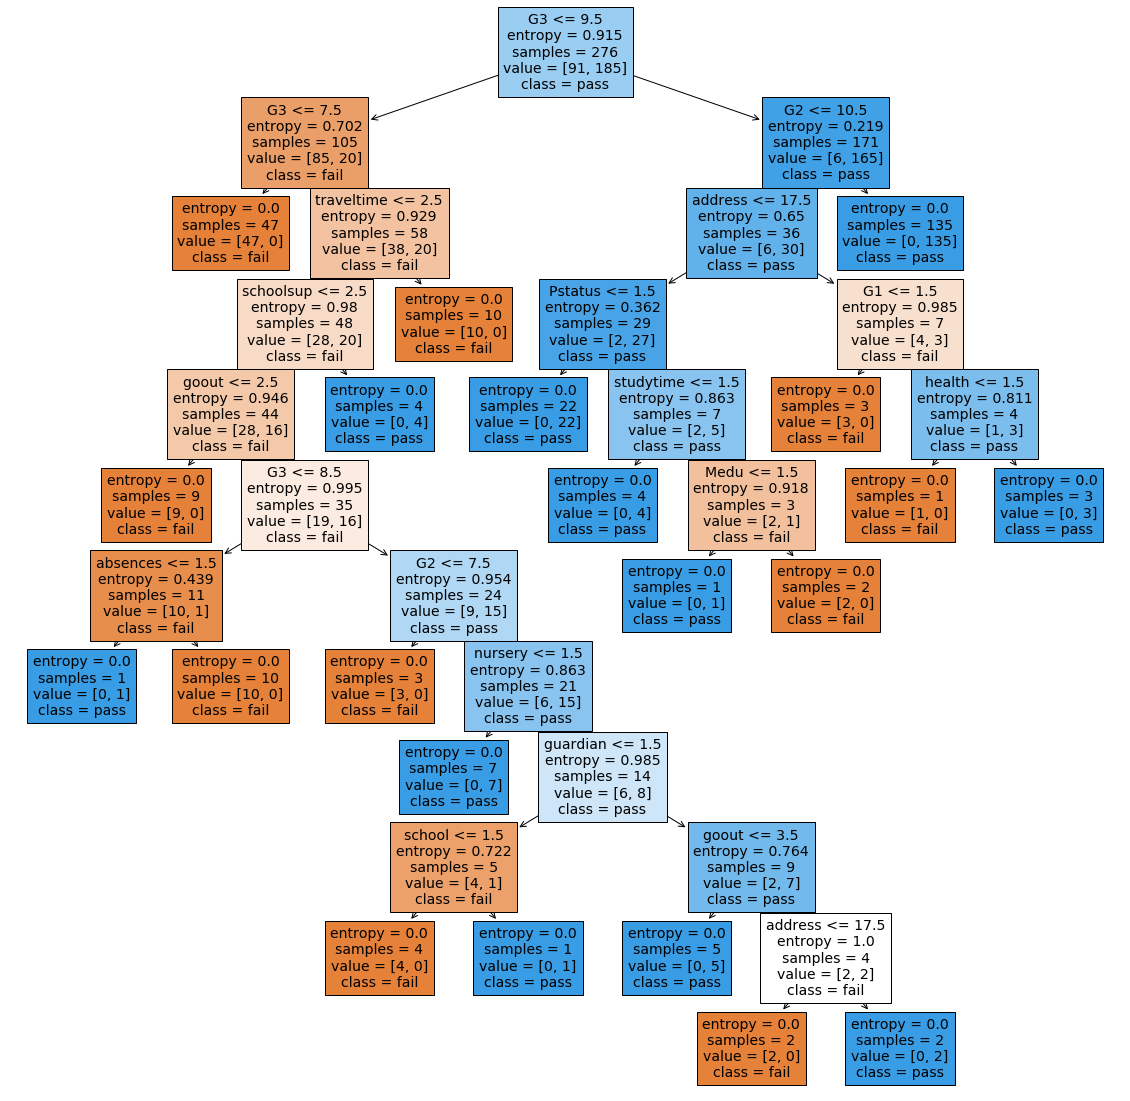

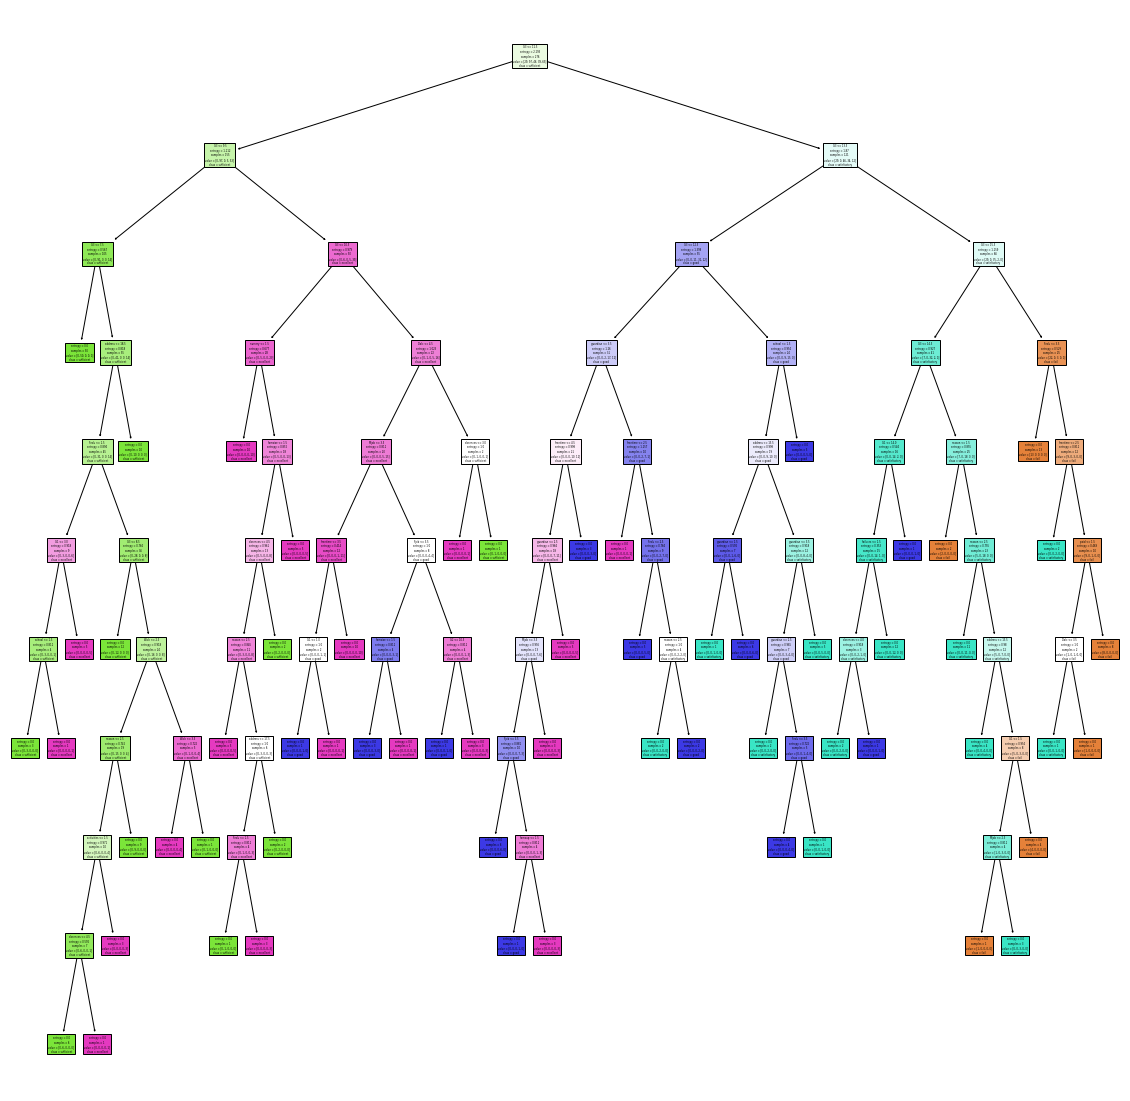

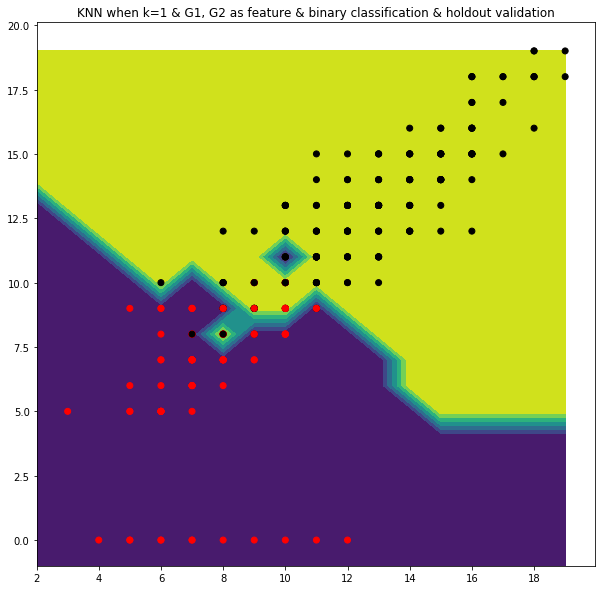

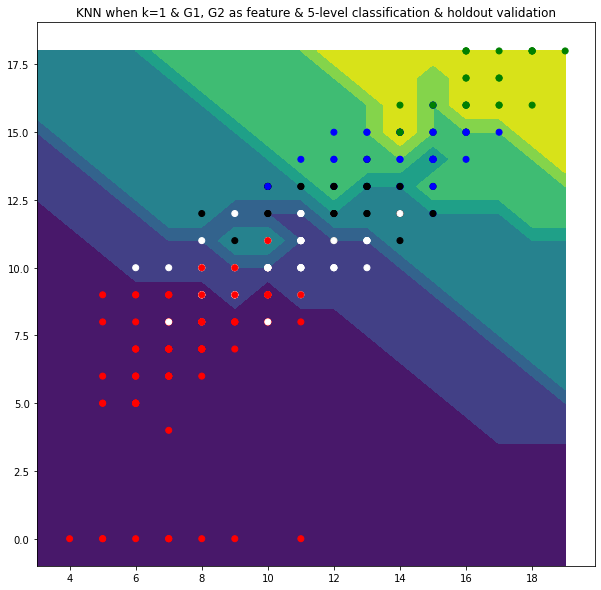

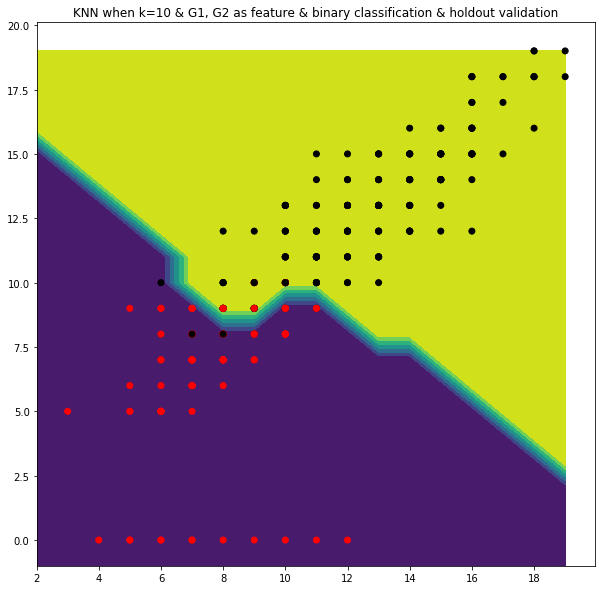

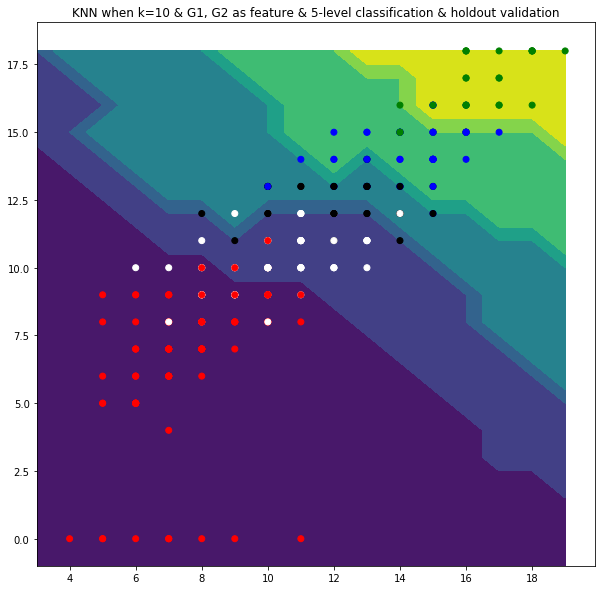

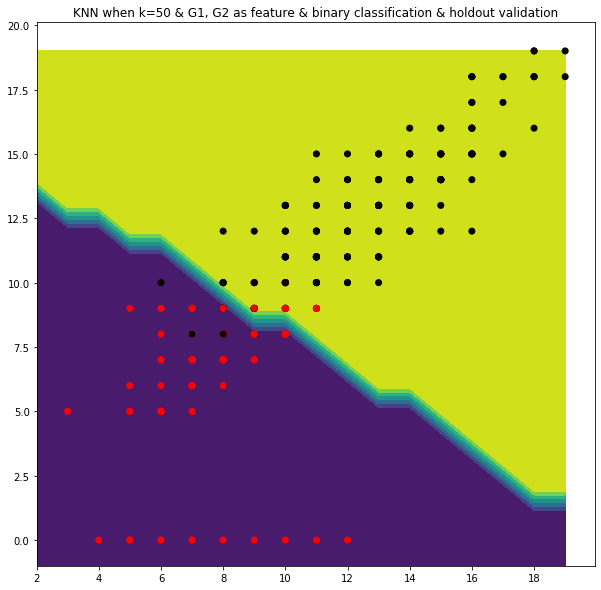

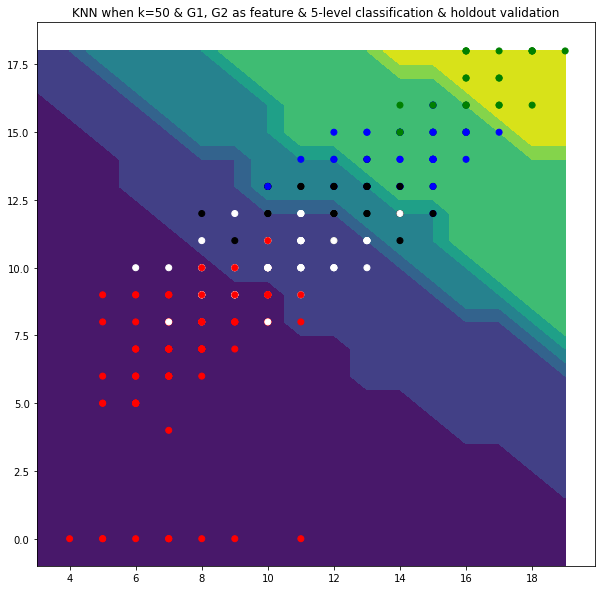

In [6]:
from sklearn.ensemble import VotingClassifier
import numpy as np
from matplotlib.colors import ListedColormap


# decision tree : print plot of decision tree
print("Decision tree : ")
# decision tree with binary classification & holdout
tree_binary.fit(x_train_binary,y_train_binary)
plt.figure(figsize = (20,20))
plt.title("Decision tree with binary classification & holdout validation")
tree.plot_tree(tree_binary, feature_names = ["school","sex,age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","guardian","traveltime","studytime","failures","schoolsup","famsup","paid","activities","nursery","higher","internet","romantic","famrel","freetime","goout","Dalc","Walc","health","absences","G1","G2","G3"
], class_names = ["fail","pass"], label = 'all', filled = True, impurity = True)
plt.show()

# decision tree with 5-level classification & holdout
tree_level.fit(x_train_level,y_train_level)
plt.figure(figsize = (20,20))
plt.title("Decision tree with 5-level classification & holdout validation")
tree.plot_tree(tree_level, feature_names = ["school","sex,age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","guardian","traveltime","studytime","failures","schoolsup","famsup","paid","activities","nursery","higher","internet","romantic","famrel","freetime","goout","Dalc","Walc","health","absences","G1","G2","G3"
], class_names = ["fail","sufficient","satisfactory","good","excellent"], label = 'all', filled = True, impurity = True)
plt.show()




# KNN
cmap_light_binary = ListedColormap(['red', 'white', 'black'])
cmap_bold_binary = ListedColormap(['red', 'white', 'black'])
cmap_light_level = ListedColormap(['red', 'white', 'black', 'blue', 'green'])
cmap_bold_level = ListedColormap(['red', 'white', 'black', 'blue', 'green'])

train_x_binary_plot = []
train_y_binary_plot = []
test_x_binary_plot = []
test_y_binary_plot = []

train_x_level_plot = []
train_y_level_plot = []
test_x_level_plot = []
test_y_level_plot = []

for i in range(len(x_train_binary)):
    train_x_binary_plot.append(x_train_binary[i][len(x_train_binary[i])-2:len(x_train_binary[i])])
    if y_train_binary[i] == 'fail':
        train_y_binary_plot.append(0)
    else:
        train_y_binary_plot.append(1)

for i in range(len(x_test_binary)):
    test_x_binary_plot.append(x_test_binary[i][len(x_test_binary[i])-2:len(x_test_binary[i])])
    if y_test_binary[i] == 'fail':
        test_y_binary_plot.append(0)
    else:
        test_y_binary_plot.append(1)


for i in range(len(x_train_level)):
    train_x_level_plot.append(x_train_level[i][len(x_train_level[i])-2:len(x_train_level[i])])
    if y_train_level[i] == 'fail':
        train_y_level_plot.append(0)
    elif y_train_level[i] == 'sufficient':
        train_y_level_plot.append(1)
    elif y_train_level[i] == 'satisfactory':
        train_y_level_plot.append(2)
    elif y_train_level[i] == 'good':
        train_y_level_plot.append(3)
    elif y_train_level[i] == 'excellent':
        train_y_level_plot.append(4)

for i in range(len(x_test_level)):
    test_x_level_plot.append(x_test_level[i][len(x_test_level[i])-2:len(x_test_level[i])])
    if y_test_level[i] == 'fail':
        test_y_level_plot.append(0)
    elif y_test_level[i] == 'sufficient':
        test_y_level_plot.append(1)
    elif y_test_level[i] == 'satisfactory':
        test_y_level_plot.append(2)
    elif y_test_level[i] == 'good':
        test_y_level_plot.append(3)
    elif y_test_level[i] == 'excellent':
        test_y_level_plot.append(4)



# KNN : k=1 & binary classification & holdout validation
plt.figure(figsize=(10,10))

numpy_x1 = np.array([row[0] for row in train_x_binary_plot])
numpy_x2 = np.array([row[1] for row in train_x_binary_plot])

x_min, x_max = numpy_x1.min()-1, numpy_x1.max()+1
y_min, y_max = numpy_x2.min()-1, numpy_x2.max()+1
xx,yy = np.meshgrid(np.arange(x_min,x_max,1),np.arange(y_min,y_max,1))

knn_1.fit(train_x_binary_plot,train_y_binary_plot)
z = knn_1.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)

plt.pcolormesh(xx, yy, z, cmap=cmap_light_binary)
plt.title("KNN when k=1 & G1, G2 as feature & binary classification & holdout validation")
plt.contourf(xx,yy,z)
plt.scatter(numpy_x1, numpy_x2, c = train_y_binary_plot, cmap=cmap_bold_binary)
plt.show()

# KNN : k=1 & 5-level classification & holdout validation
plt.figure(figsize=(10,10))

numpy_x1 = np.array([row[0] for row in train_x_level_plot])
numpy_x2 = np.array([row[1] for row in train_x_level_plot])

x_min, x_max = numpy_x1.min()-1, numpy_x1.max()+1
y_min, y_max = numpy_x2.min()-1, numpy_x2.max()+1
xx,yy = np.meshgrid(np.arange(x_min,x_max,1),np.arange(y_min,y_max,1))

knn_1.fit(train_x_level_plot,train_y_level_plot)
z = knn_1.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)

plt.pcolormesh(xx, yy, z, cmap=cmap_light_level)
plt.title("KNN when k=1 & G1, G2 as feature & 5-level classification & holdout validation")
plt.contourf(xx,yy,z)
plt.scatter(numpy_x1, numpy_x2, c = train_y_level_plot, cmap=cmap_bold_level)
plt.show()



# KNN : k=10 & binary classification & holdout validation
plt.figure(figsize=(10,10))

numpy_x1 = np.array([row[0] for row in train_x_binary_plot])
numpy_x2 = np.array([row[1] for row in train_x_binary_plot])

x_min, x_max = numpy_x1.min()-1, numpy_x1.max()+1
y_min, y_max = numpy_x2.min()-1, numpy_x2.max()+1
xx,yy = np.meshgrid(np.arange(x_min,x_max,1),np.arange(y_min,y_max,1))

knn_10.fit(train_x_binary_plot,train_y_binary_plot)
z = knn_10.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)

plt.pcolormesh(xx, yy, z, cmap=cmap_light_binary)
plt.title("KNN when k=10 & G1, G2 as feature & binary classification & holdout validation")
plt.contourf(xx,yy,z)
plt.scatter(numpy_x1, numpy_x2, c = train_y_binary_plot, cmap=cmap_bold_binary)
plt.show()

# KNN : k=10 & 5-level classification & holdout validation
plt.figure(figsize=(10,10))

numpy_x1 = np.array([row[0] for row in train_x_level_plot])
numpy_x2 = np.array([row[1] for row in train_x_level_plot])

x_min, x_max = numpy_x1.min()-1, numpy_x1.max()+1
y_min, y_max = numpy_x2.min()-1, numpy_x2.max()+1
xx,yy = np.meshgrid(np.arange(x_min,x_max,1),np.arange(y_min,y_max,1))

knn_10.fit(train_x_level_plot,train_y_level_plot)
z = knn_10.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)

plt.pcolormesh(xx, yy, z, cmap=cmap_light_level)
plt.title("KNN when k=10 & G1, G2 as feature & 5-level classification & holdout validation")
plt.contourf(xx,yy,z)
plt.scatter(numpy_x1, numpy_x2, c = train_y_level_plot, cmap=cmap_bold_level)
plt.show()




# KNN : k=50 & binary classification & holdout validation
plt.figure(figsize=(10,10))

numpy_x1 = np.array([row[0] for row in train_x_binary_plot])
numpy_x2 = np.array([row[1] for row in train_x_binary_plot])

x_min, x_max = numpy_x1.min()-1, numpy_x1.max()+1
y_min, y_max = numpy_x2.min()-1, numpy_x2.max()+1
xx,yy = np.meshgrid(np.arange(x_min,x_max,1),np.arange(y_min,y_max,1))

knn_50.fit(train_x_binary_plot,train_y_binary_plot)
z = knn_50.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)

plt.pcolormesh(xx, yy, z, cmap=cmap_light_binary)
plt.title("KNN when k=50 & G1, G2 as feature & binary classification & holdout validation")
plt.contourf(xx,yy,z)
plt.scatter(numpy_x1, numpy_x2, c = train_y_binary_plot, cmap=cmap_bold_binary)
plt.show()


# KNN : k=50 & 5-level classification & holdout validation
plt.figure(figsize=(10,10))

numpy_x1 = np.array([row[0] for row in train_x_level_plot])
numpy_x2 = np.array([row[1] for row in train_x_level_plot])

x_min, x_max = numpy_x1.min()-1, numpy_x1.max()+1
y_min, y_max = numpy_x2.min()-1, numpy_x2.max()+1
xx,yy = np.meshgrid(np.arange(x_min,x_max,1),np.arange(y_min,y_max,1))

knn_50.fit(train_x_level_plot,train_y_level_plot)
z = knn_50.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)

plt.pcolormesh(xx, yy, z, cmap=cmap_light_level)
plt.title("KNN when k=50 & G1, G2 as feature & 5-level classification & holdout validation")
plt.contourf(xx,yy,z)
plt.scatter(numpy_x1, numpy_x2, c = train_y_level_plot, cmap=cmap_bold_level)
plt.show()

